
# Analysis Data PFT Pilots

In [91]:
from IPython.display import Image
#Image(filename='task_image.png')

## Load data participants

In [92]:
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots Pet/Data/All/PFT_Choice_Pilot_All.csv') 
data_exp_ratings_2 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots Pet/Data/All/PFT_idRatingsFrame_Pilot_All.csv') 

In [93]:
# Insert to exclude particitipants
excludedPart = []
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[0 1 2 3 4]
Number of participants: 5


In [94]:
data_exp1.head()

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,primerSound,rightId,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
0,1.0,4.0,NaN,NaN,0,3.0,2.0,NaN,NaN,1.0,...,1.0,2.0,0.0,14.011541,29.976978,0.016906,6.511024,1.065794,1.566313,3.510177
1,3.0,2.0,NaN,NaN,0,2.0,3.0,NaN,NaN,-1.0,...,1.0,6.0,1.0,16.016302,43.990964,0.014470,7.515057,1.053664,1.553902,3.514876
2,1.0,4.0,NaN,NaN,0,3.0,2.0,NaN,NaN,-1.0,...,1.0,2.0,2.0,18.015984,60.010107,0.057480,8.514907,1.102538,1.603700,3.514081
3,2.0,3.0,NaN,NaN,0,3.0,2.0,NaN,NaN,-1.0,...,2.0,2.0,3.0,16.000103,78.028215,0.014218,7.515609,1.053275,1.554410,3.514568
4,1.0,4.0,NaN,NaN,0,4.0,1.0,NaN,NaN,1.0,...,2.0,1.0,4.0,14.016120,94.030169,0.013254,6.515891,1.053375,1.554291,3.514665


In [95]:
data_exp_ratings_2

,nameId,rat1,rat2,var1,var2,Part
0,1,4.0,1.0,NaN,NaN,0
1,2,3.0,2.0,NaN,NaN,0
2,5,1.0,4.0,NaN,NaN,0
3,6,2.0,3.0,NaN,NaN,0
4,1,4.0,1.0,NaN,NaN,1
5,2,1.0,4.0,NaN,NaN,1
6,5,3.0,2.0,NaN,NaN,1
7,6,2.0,3.0,NaN,NaN,1
8,1,3.0,2.0,NaN,NaN,2
9,2,4.0,1.0,NaN,NaN,2


In [96]:
data_exp1=data_exp1.rename(index=str, columns={"choiceTime":"RT", })

## drop NaNs from choice rows

In [97]:
#data_exp1 = data_exp1.dropna(axis = 0, how ='any') 
#data_exp_ratings_2 = data_exp_ratings_2.dropna(axis = 0, how ='any') 

In [98]:
data_exp1 = data_exp1.reset_index()
data_exp_ratings_2 = data_exp_ratings_2.reset_index()

## add extra value information

In [99]:
data_exp1["TotVal1"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["TotVal2"] = data_exp1['RRat2']+ data_exp1['LRat2']


data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )

data_exp1["DVar1"] = data_exp1['RVar1'] - data_exp1['LVar1']
data_exp1["absDVar1"] = np.abs(data_exp1["DVar1"] )

data_exp1["DVal2"] = data_exp1['RRat2'] - data_exp1['LRat2']
data_exp1["absDVal2"] = np.abs(data_exp1["DVal2"] )

data_exp1["DVar2"] = data_exp1['RVar2'] - data_exp1['LVar2']
data_exp1["absDVar2"] = np.abs(data_exp1["DVar2"] )

## add z-scores

In [100]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")

data_exp1["zDVal2"] = z_score1(data_exp1,'Part',"DVal2")
data_exp1["zabsDVal2"] = z_score1(data_exp1,'Part',"absDVal2")

data_exp1["zDVar1"] = z_score1(data_exp1,'Part',"DVar1")
data_exp1["zabsDVar1"] = z_score1(data_exp1,'Part',"absDVar1")

data_exp1["zDVar2"] = z_score1(data_exp1,'Part',"DVar2")
data_exp1["zabsDVar2"] = z_score1(data_exp1,'Part',"absDVar2")

data_exp1["zTotVal1"] = z_score1(data_exp1,'Part',"TotVal1")
data_exp1["zTotVal2"] = z_score1(data_exp1,'Part',"TotVal2")
data_exp1["zRT"] = z_score1(data_exp1,'Part',"RT")

In [101]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct"] = Correct

## change choices from -1 to 0 for left

In [102]:
choices = []
for i in range(len(data_exp1)):
        if (data_exp1.choice[i] == 1):
            choices.append(1)
        else:
            choices.append(0)

data_exp1["choices"] = choices

In [103]:
data_exp1

,index,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,...,zabsDVal2,zDVar1,zabsDVar1,zDVar2,zabsDVar2,zTotVal1,zTotVal2,zRT,correct,choices
0,0,1.0,4.0,NaN,NaN,0,3.0,2.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,-0.774597,0.774597,-0.664135,1,1
1,1,3.0,2.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,0.000000,0.000000,0.339386,1,0
2,2,1.0,4.0,NaN,NaN,0,3.0,2.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,-0.774597,0.774597,1.278176,1,0
3,3,2.0,3.0,NaN,NaN,0,3.0,2.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.235905,0,0
4,4,1.0,4.0,NaN,NaN,0,4.0,1.0,NaN,NaN,...,1.788854,NaN,NaN,NaN,NaN,0.000000,0.000000,-1.040925,1,1
5,5,1.0,4.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,-1.549193,1.549193,0.901472,1,0
6,6,4.0,1.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,0.774597,-0.774597,-1.271666,1,1
7,7,2.0,3.0,NaN,NaN,0,4.0,1.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,0.774597,-0.774597,1.010278,1,1
8,8,3.0,2.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,0.000000,0.000000,-1.136422,1,1
9,9,2.0,3.0,NaN,NaN,0,1.0,4.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,-1.549193,1.549193,0.935646,1,1


# Ratings data analysis
----------------------------------------
## by rating I refer to the value assigned to each celebrity in like (FRAME 1) and dislile (FRAME 2)

## 1. Data visualization

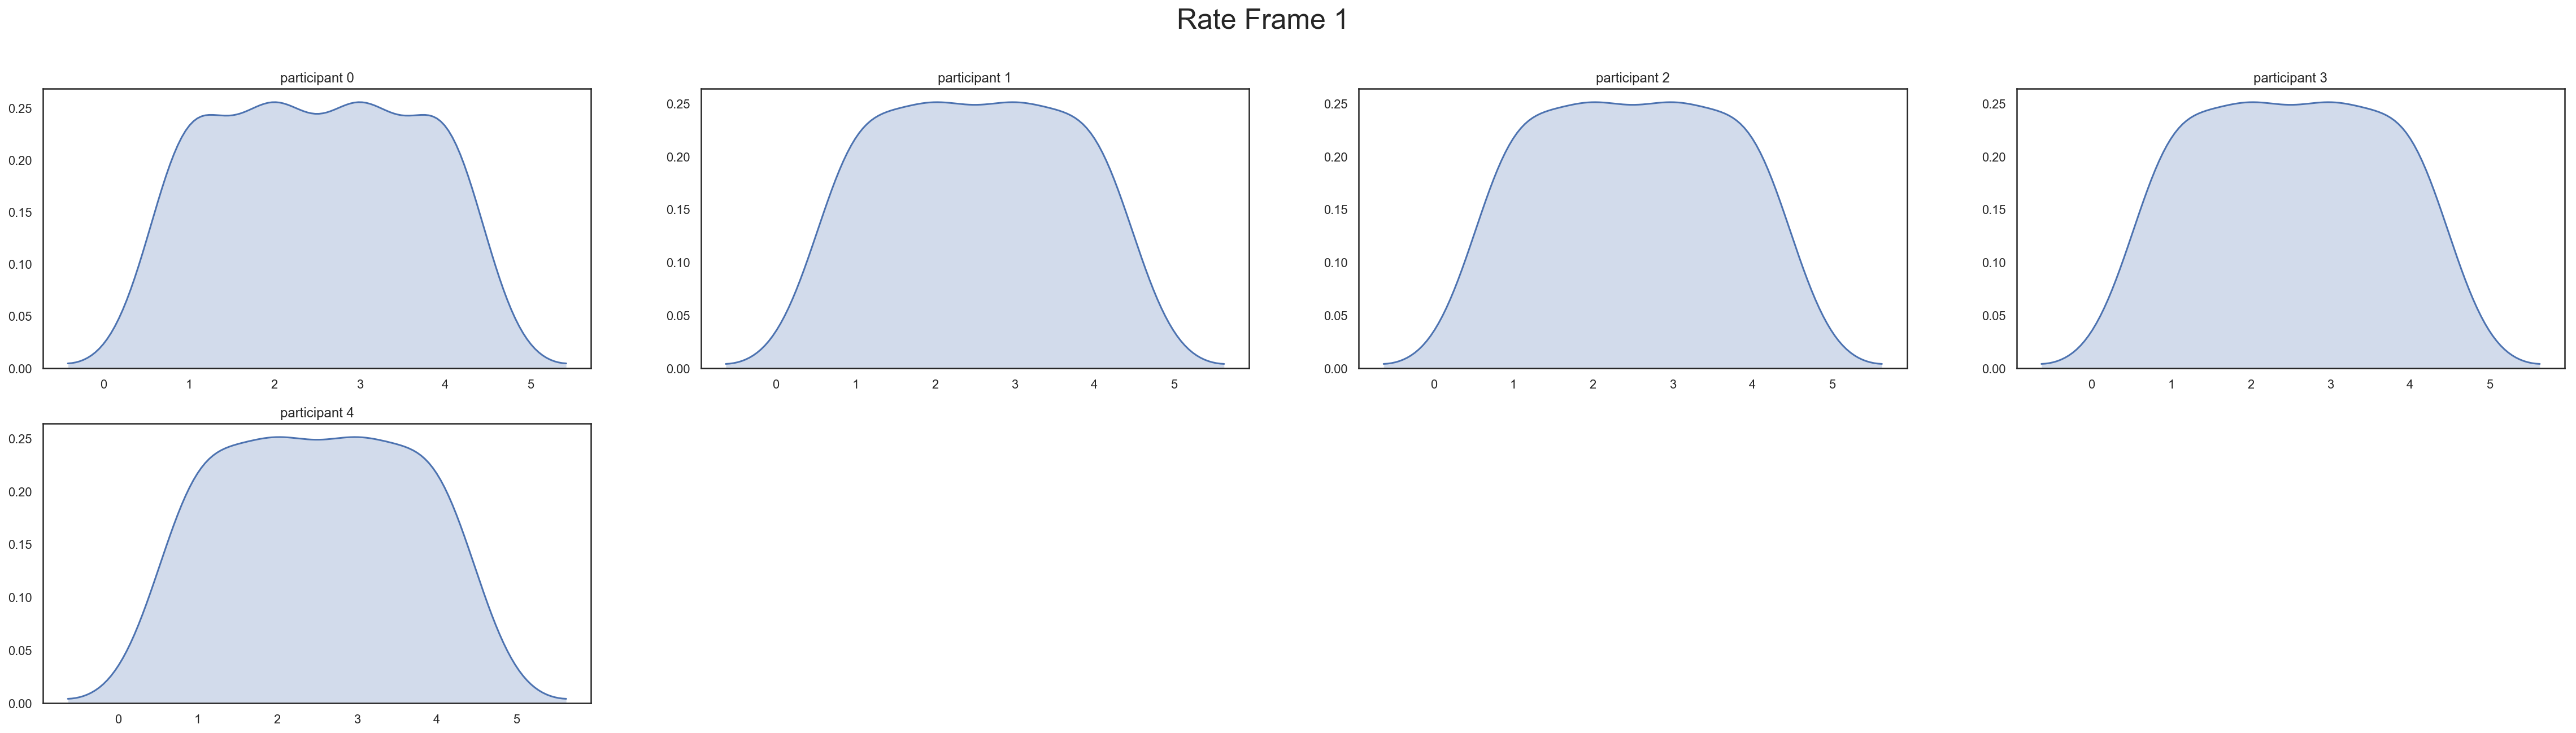

In [104]:
participant_densities(data_exp1,'RRat1', title = 'Rate Frame 1')

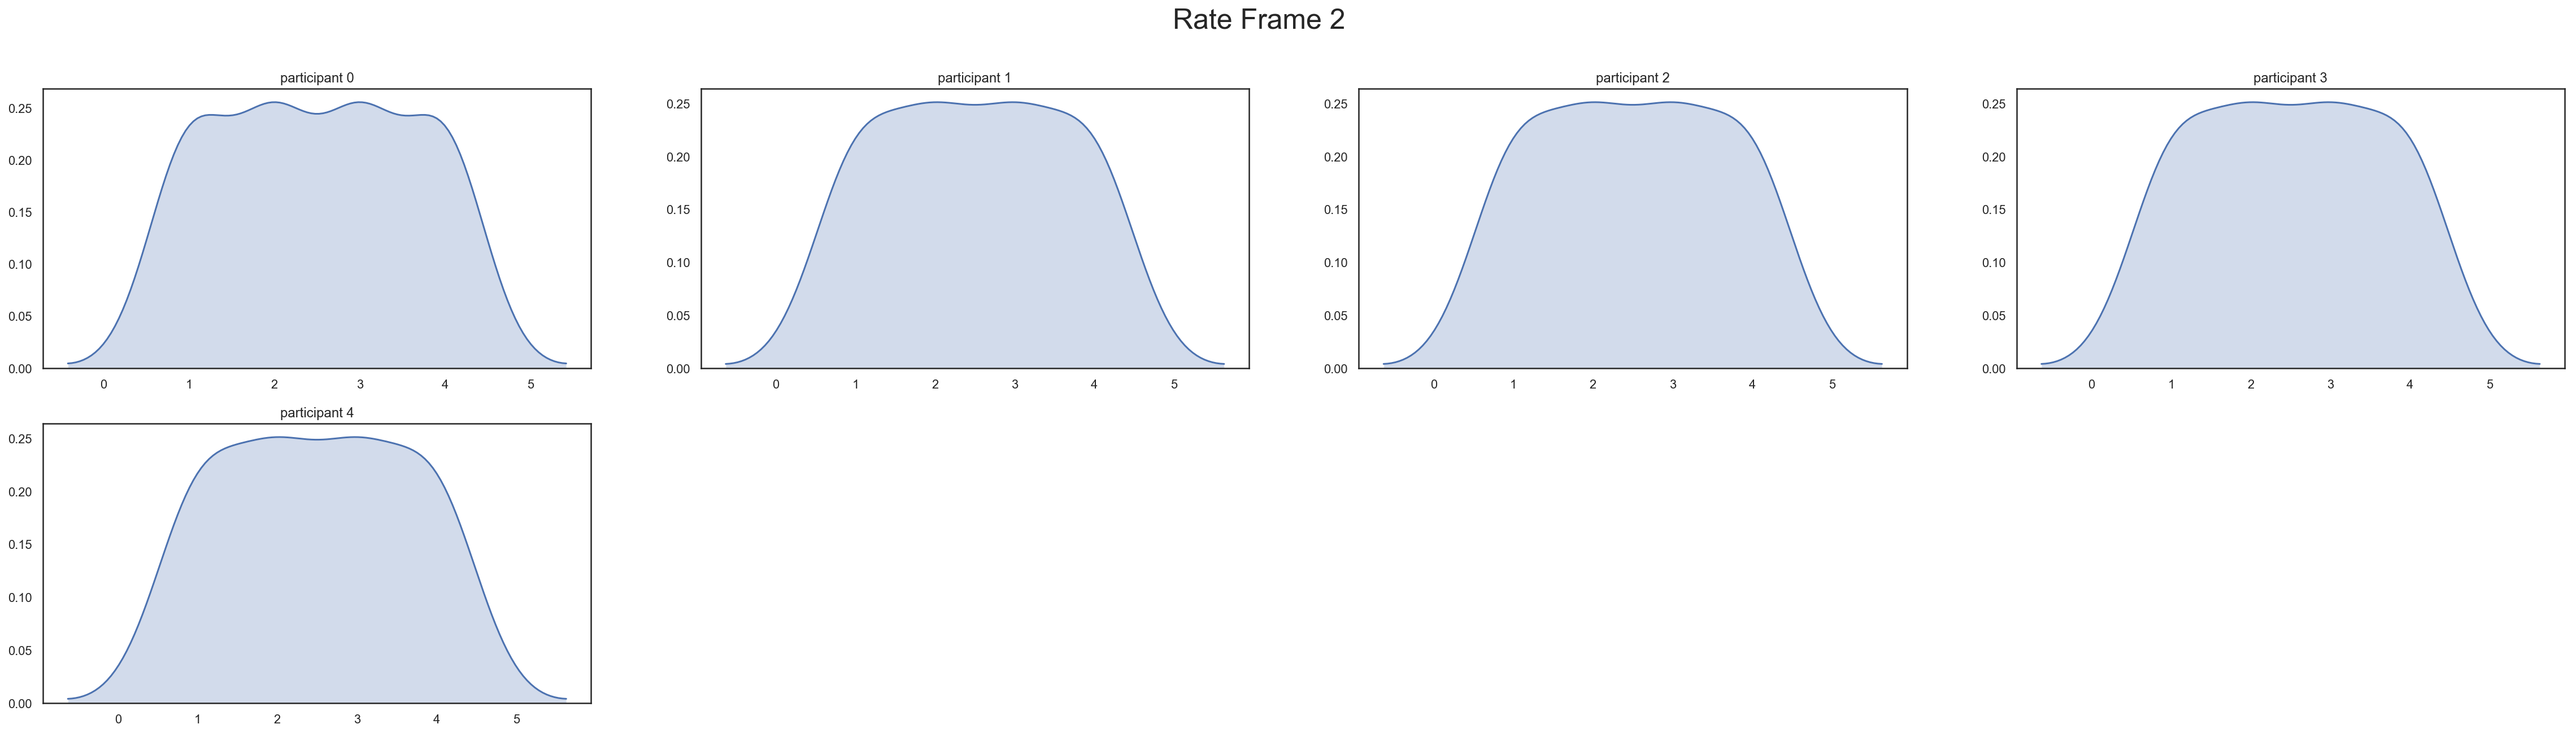

In [105]:
participant_densities(data_exp1,'RRat2', title = 'Rate Frame 2 ')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: 0.0 cannot be raised to a negative power

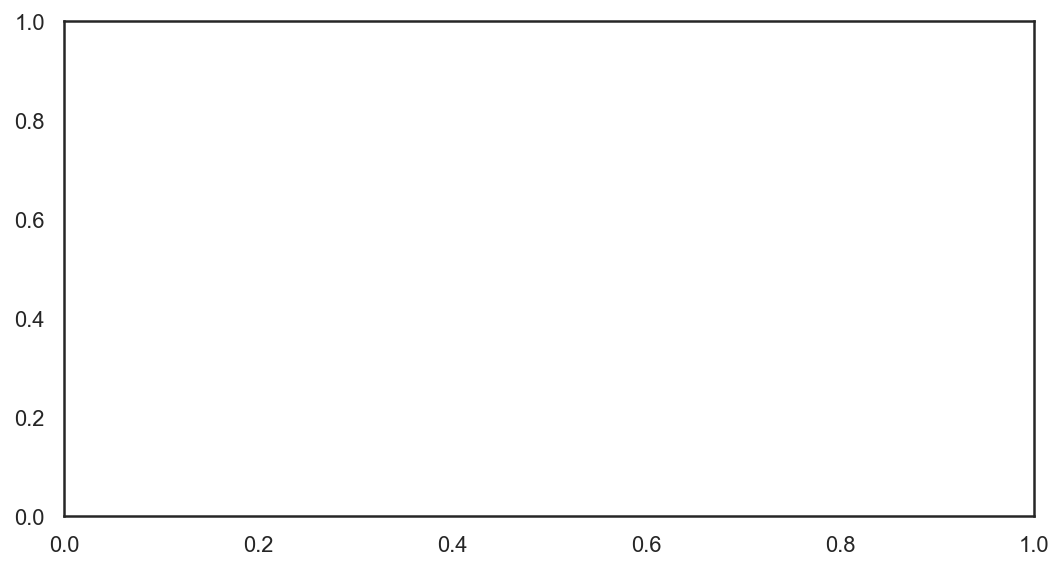

In [106]:
participant_densities(data_exp1,'RVar1', title = 'Variability Frame 1')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: 0.0 cannot be raised to a negative power

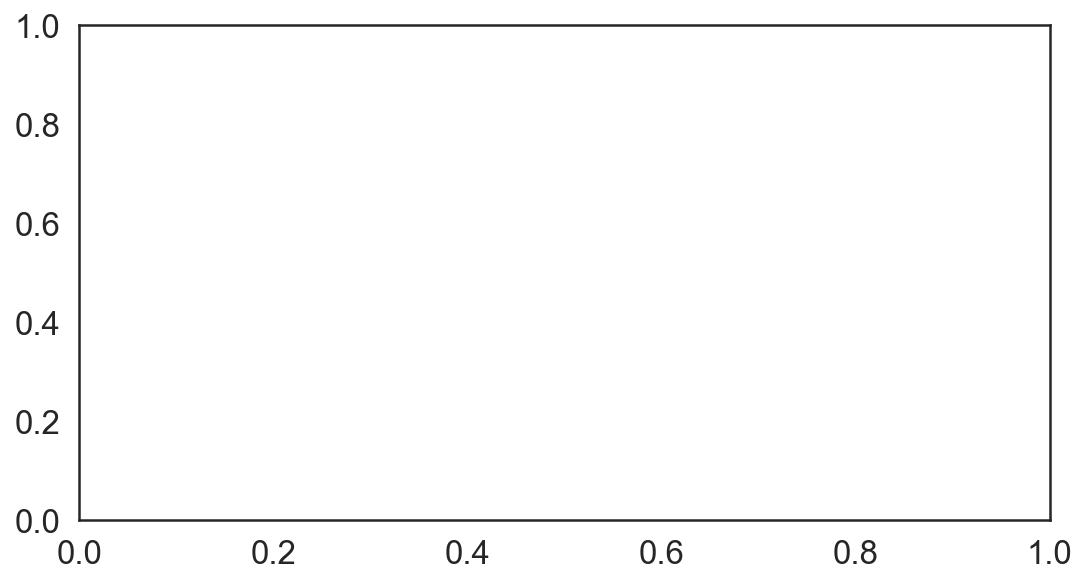

In [134]:
participant_densities(data_exp1,'RVar2', title = 'Variability Frame 2')

## 2.  Items ratings in both frames

In [ ]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Ratings Frame 1','rat2','Ratings Frame 2')

LinAlgError: SVD did not converge in Linear Least Squares

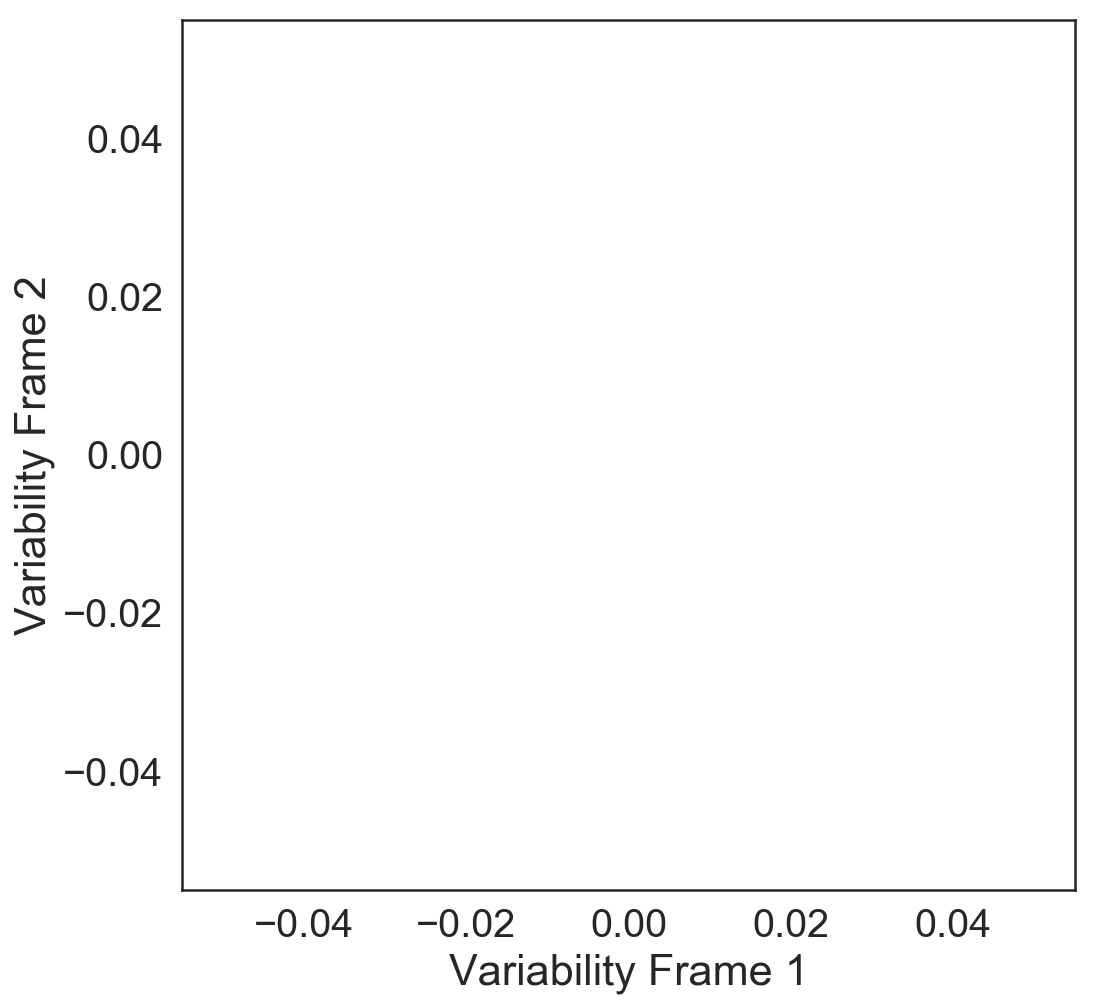

In [135]:
corrPlotSimple(data_exp_ratings_2, 'var1','Variability Frame 1','var2','Variability Frame 2')

## 3. Relationship between rating and variability. Notice that for rating, the range [0 - 50] the value 25 corresponds to indifference between like and dislike 

LinAlgError: SVD did not converge in Linear Least Squares

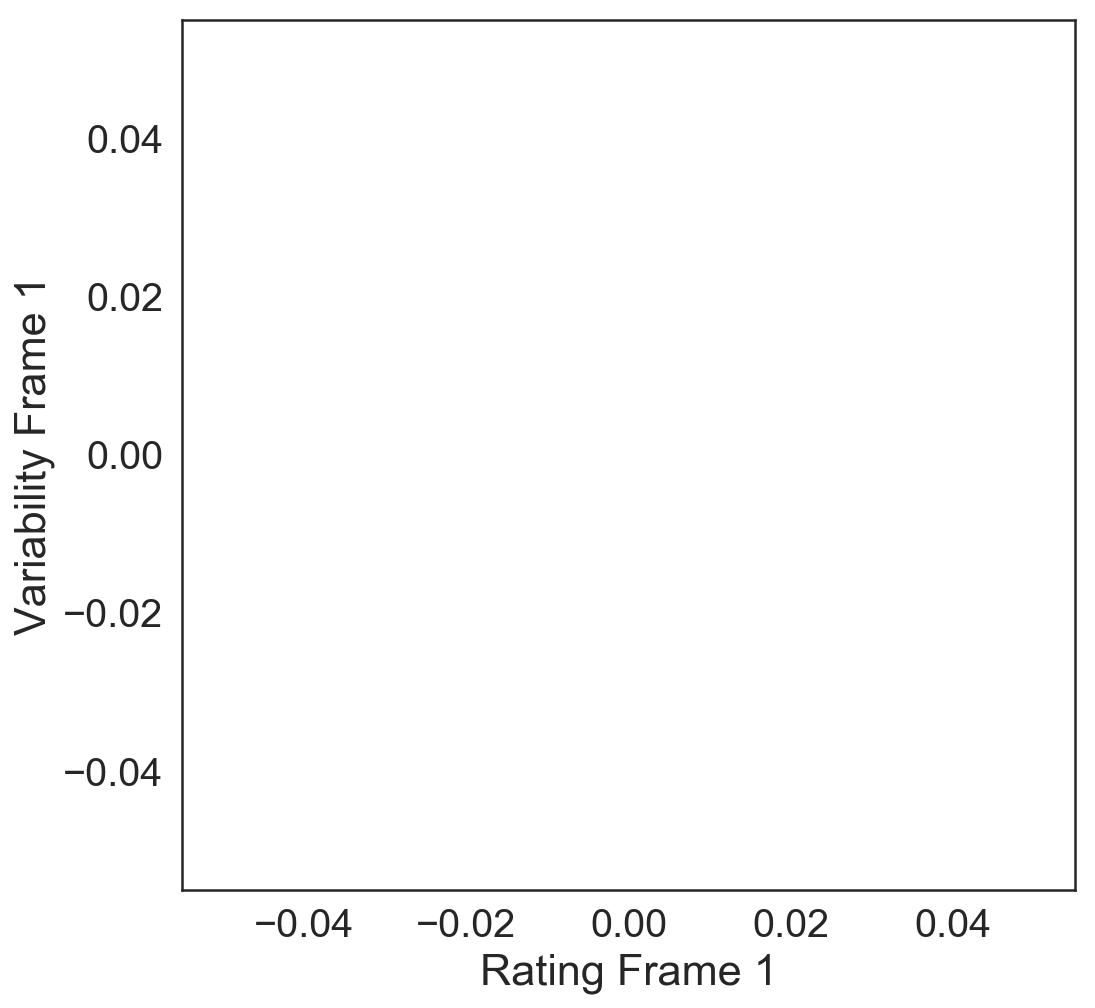

In [136]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Rating Frame 1','var1','Variability Frame 1')

LinAlgError: SVD did not converge in Linear Least Squares

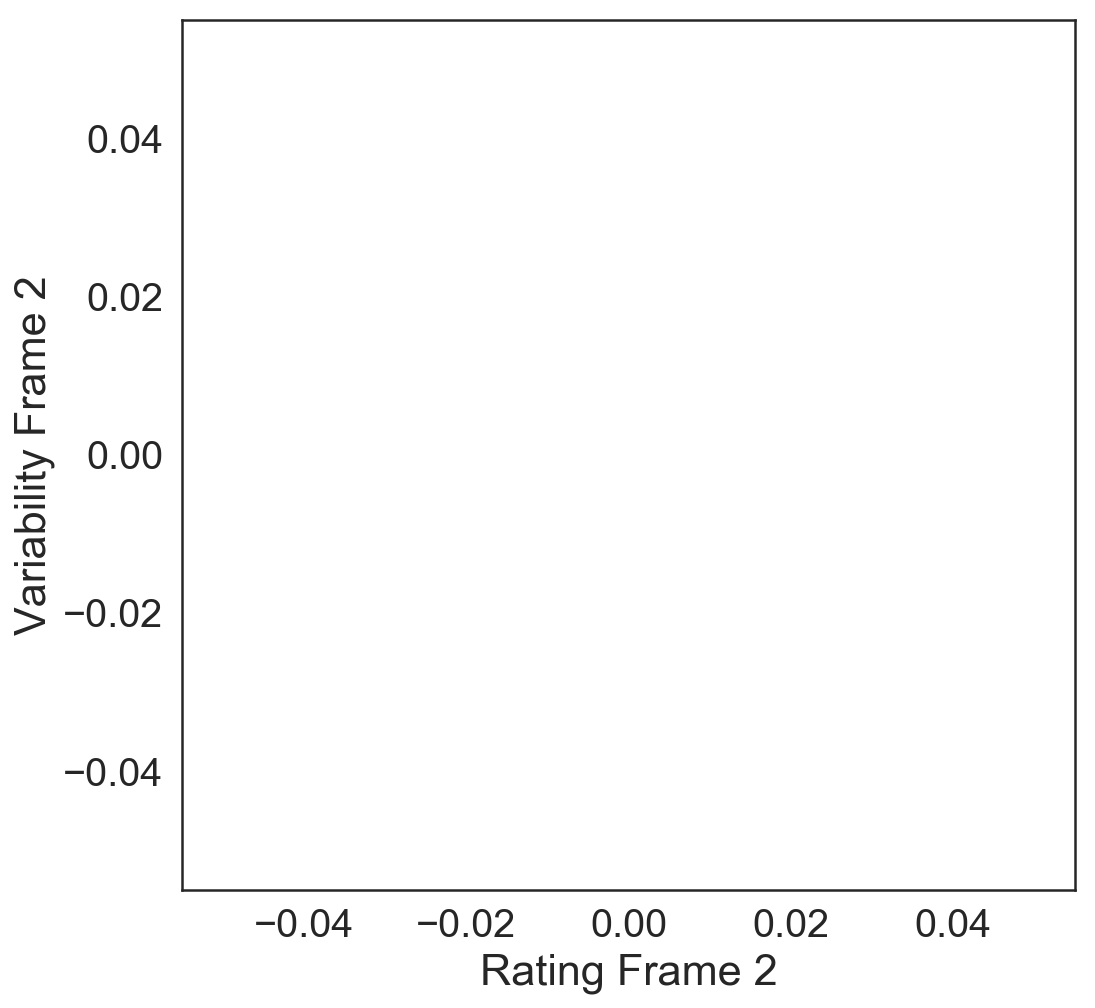

In [137]:
corrPlotSimple(data_exp_ratings_2, 'rat2','Rating Frame 2','var2','Variability Frame 2')

## 4. I create an index of partiallity ( how much I like/dislike something, with 0 representing indifference and 25 representing absolute like/dislike for that celebrity)

In [138]:
# if we adapt the rating scale to leave value 25 at the center of the scale (0) we can characterize the level of indifference that the celebrity generates
data_exp_ratings_2['partiality1'] = np.abs(data_exp_ratings_2.rat1-25)
data_exp_ratings_2['partiality2'] = np.abs(data_exp_ratings_2.rat2-25)

LinAlgError: SVD did not converge in Linear Least Squares

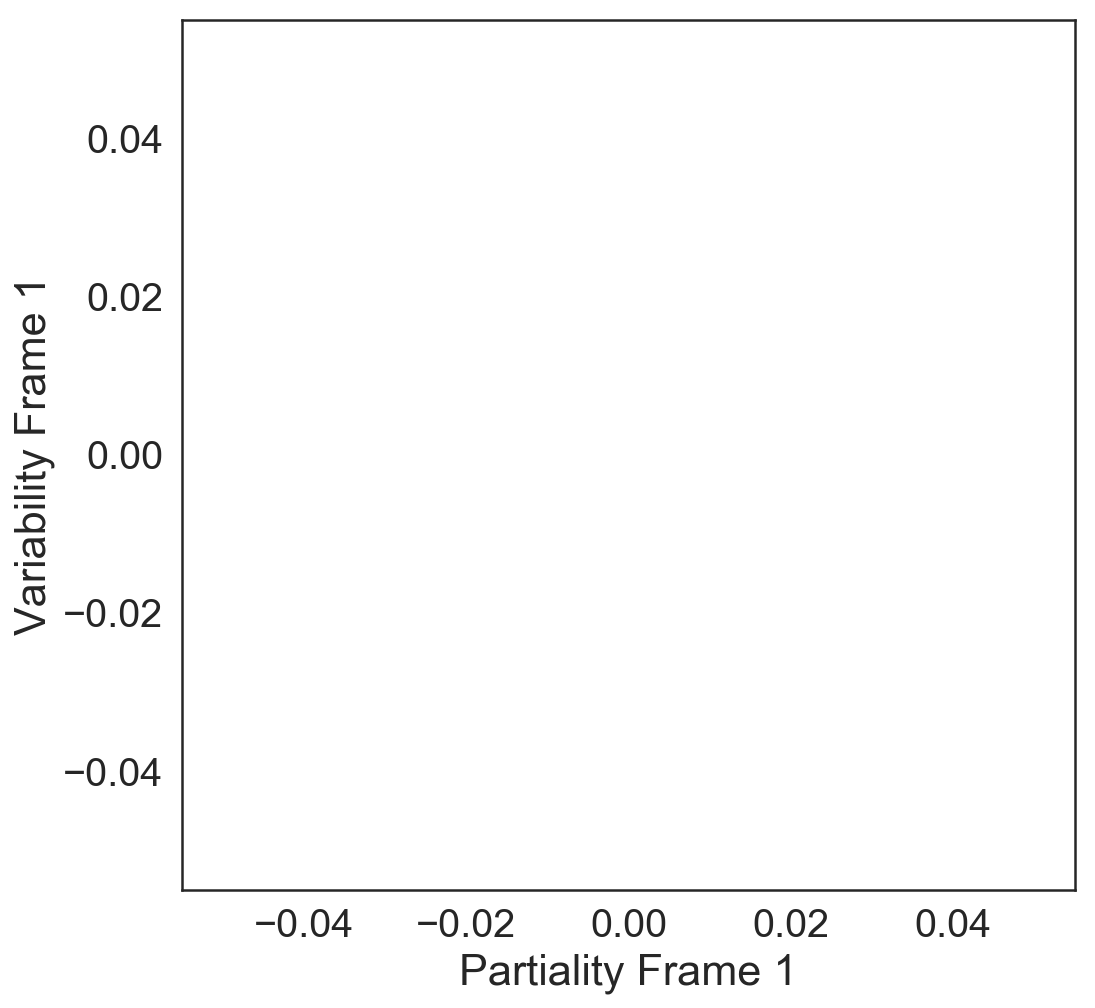

In [139]:
corrPlotSimple(data_exp_ratings_2, 'partiality1','Partiality Frame 1','var1','Variability Frame 1')
corrPlotSimple(data_exp_ratings_2, 'partiality2','Partiality Frame 2','var2','Variability Frame 2')

### Using the ratings given in like and dislike frame I found that variability in rating is higher in celebrities that that generate more indiffence in the participants.

## 5. Example ratings for each celebrity in one participant

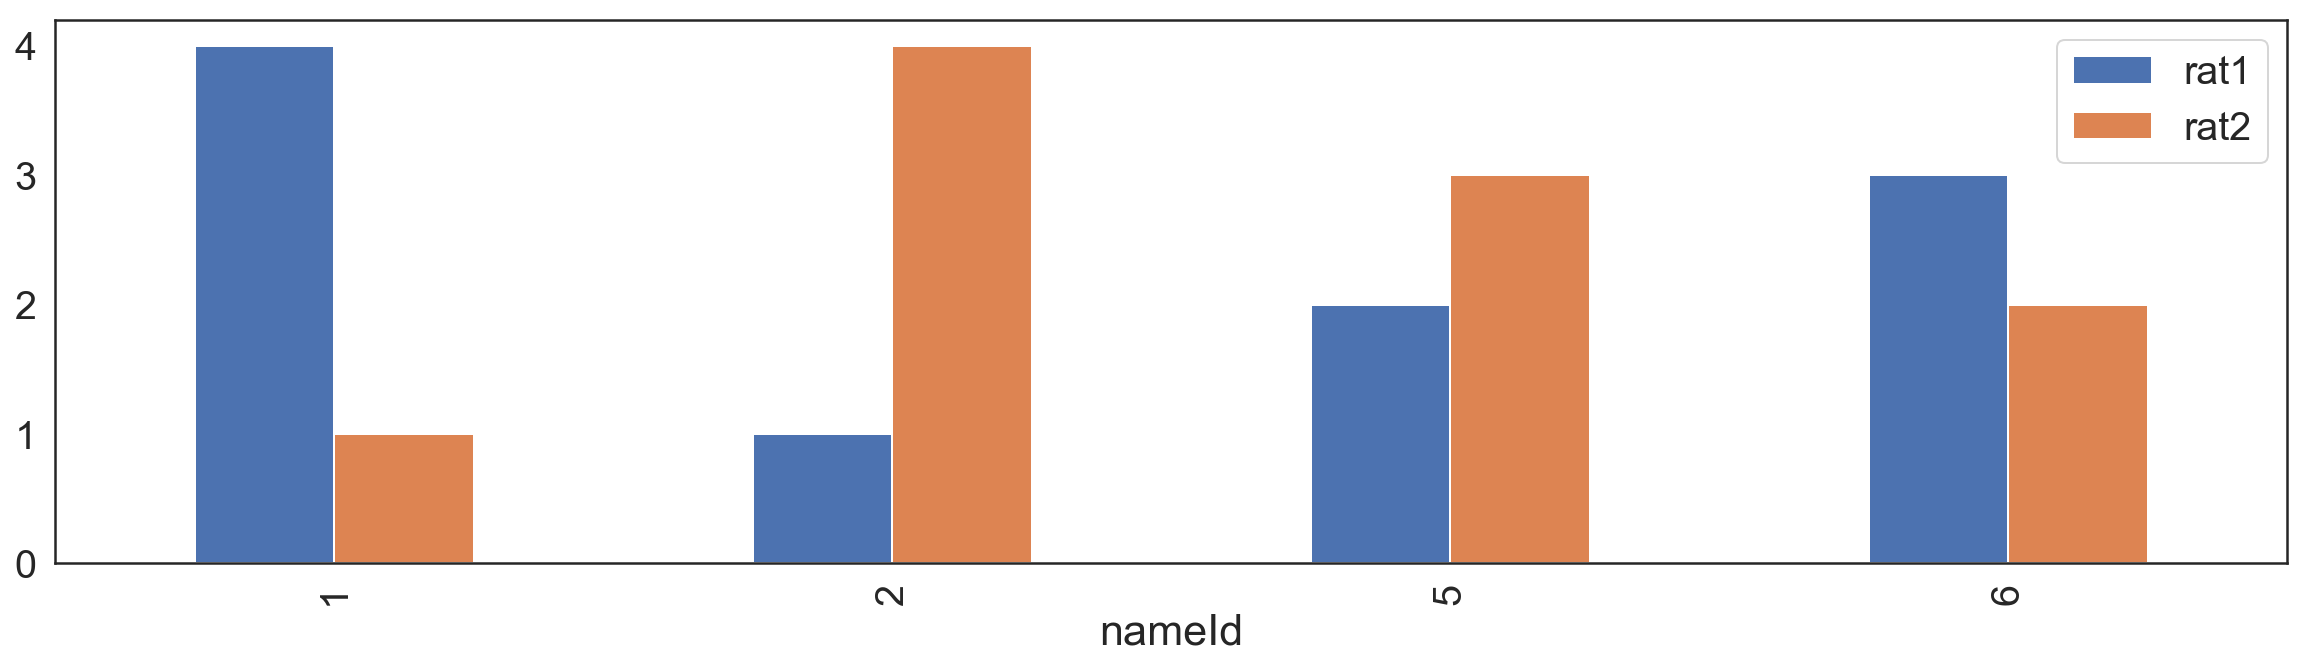

In [140]:
ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 3)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), )


## 6. Example ratings  for each celebrity for all participants

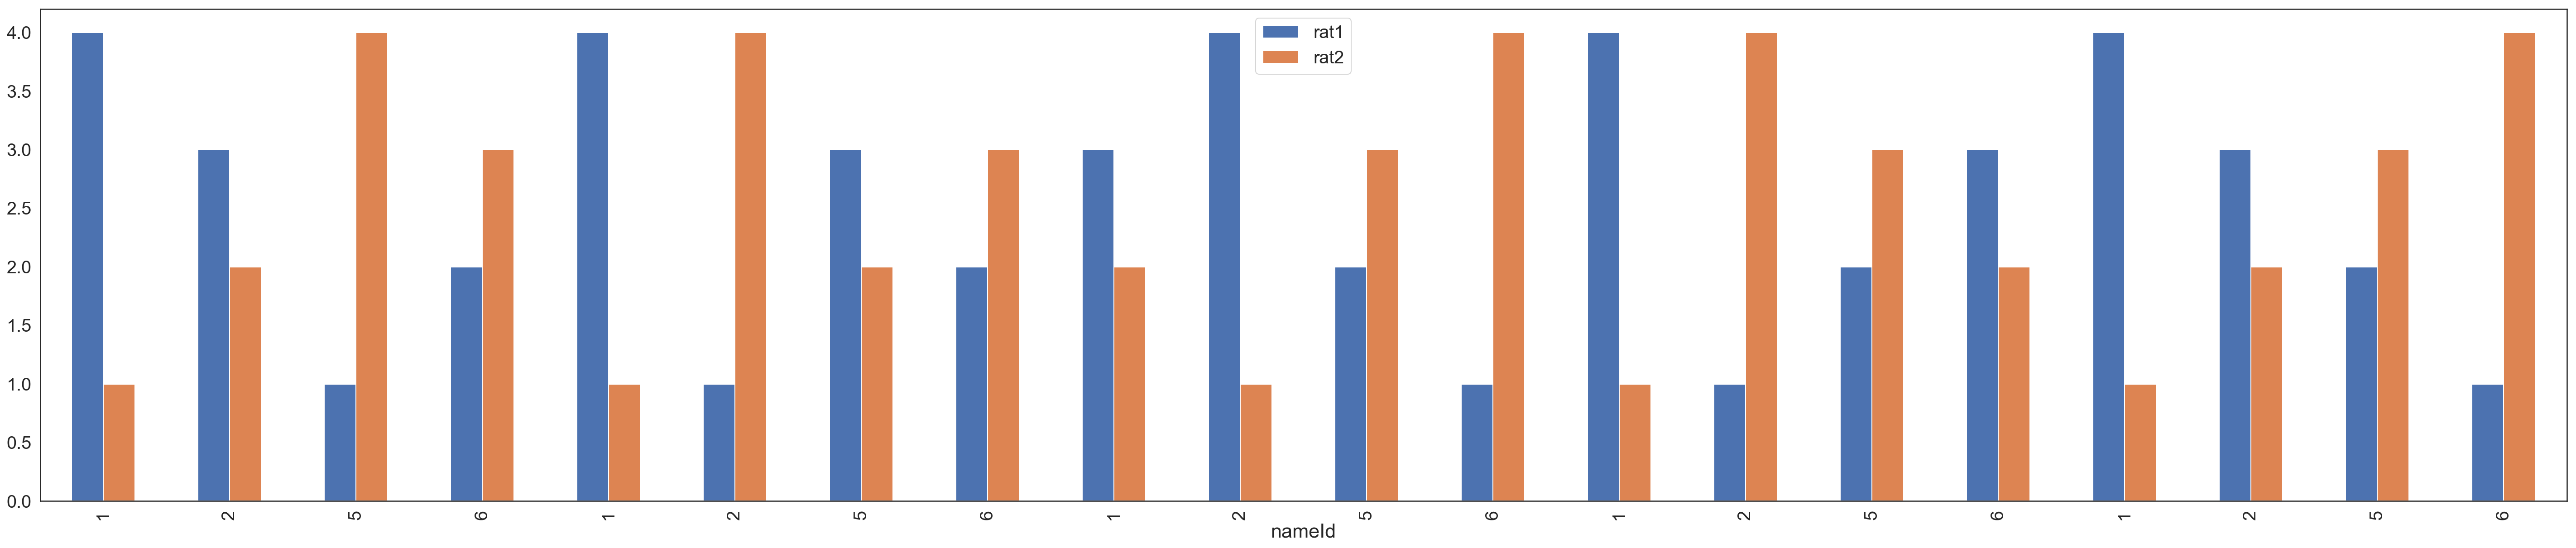

In [141]:
data_exp_ratings_2.plot.bar(x='nameId',y=['rat1','rat2'], figsize=(50,10))

#  Choice data analysis
-----------------------------------------------------------------------

## 1. Data visualization

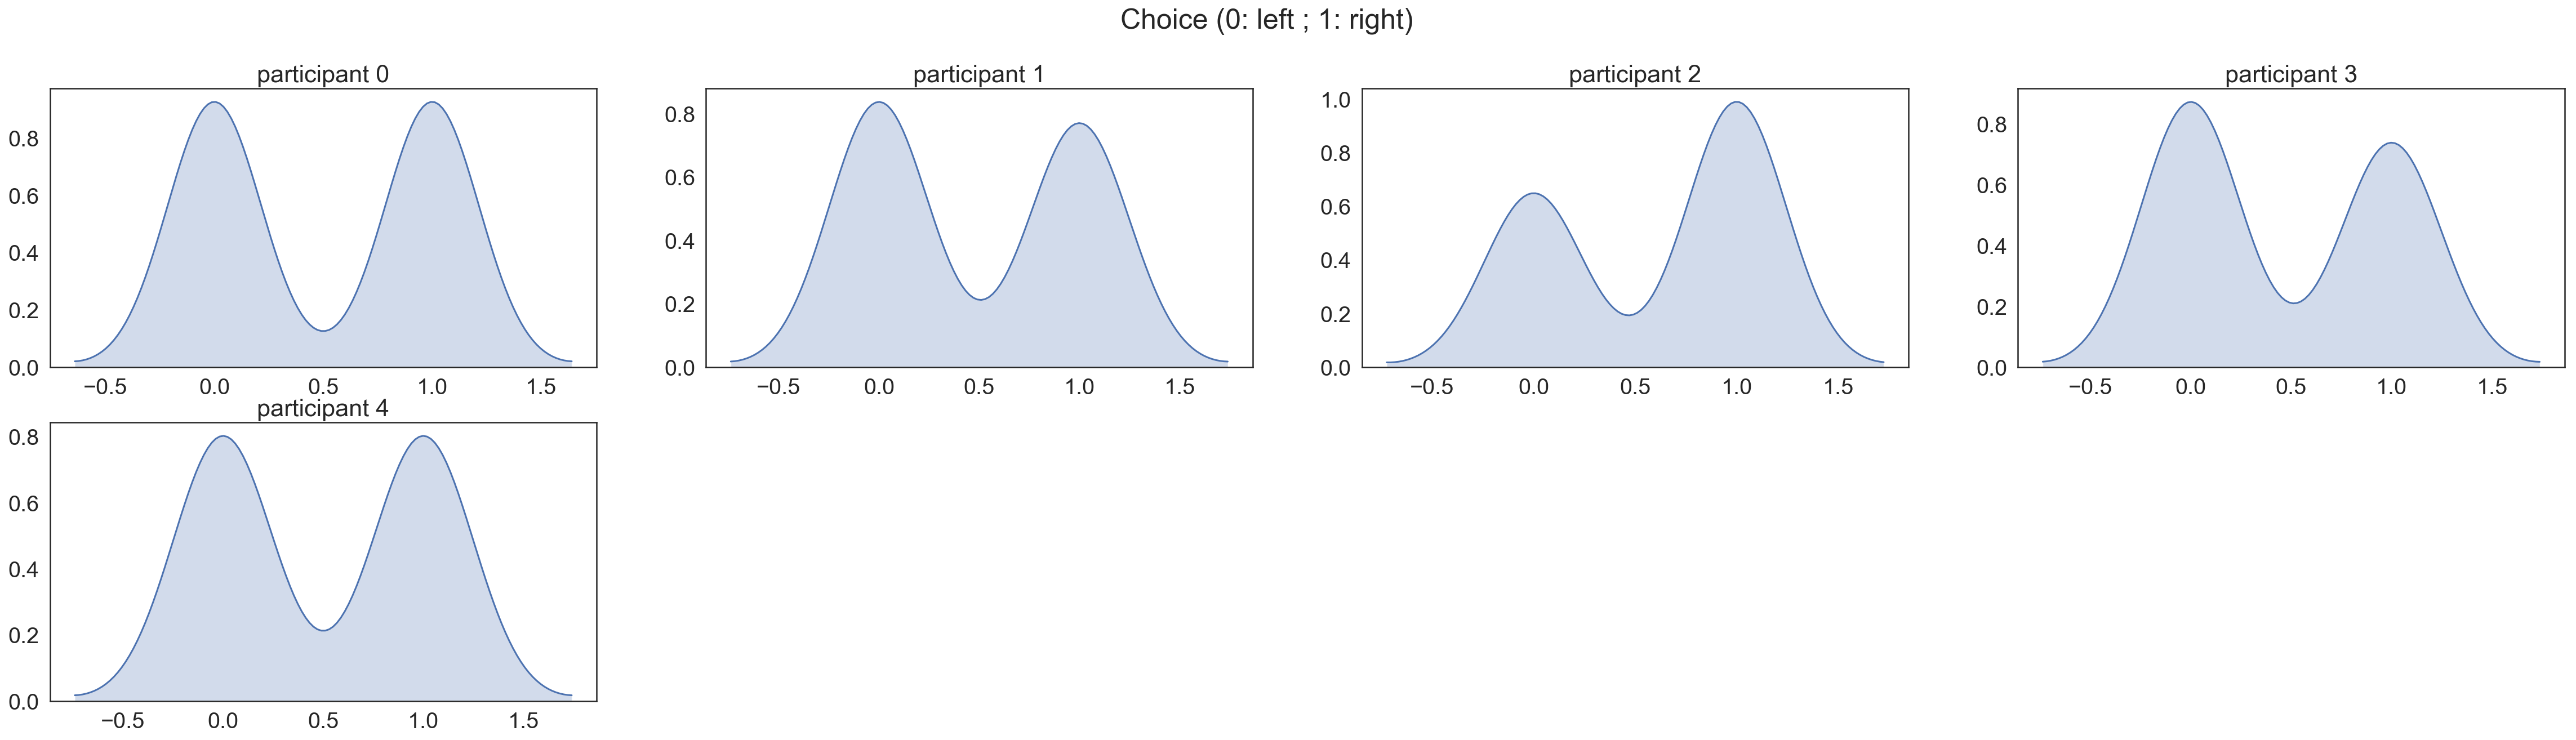

In [142]:
participant_densities(data_exp1,'choices', title = 'Choice (0: left ; 1: right)')

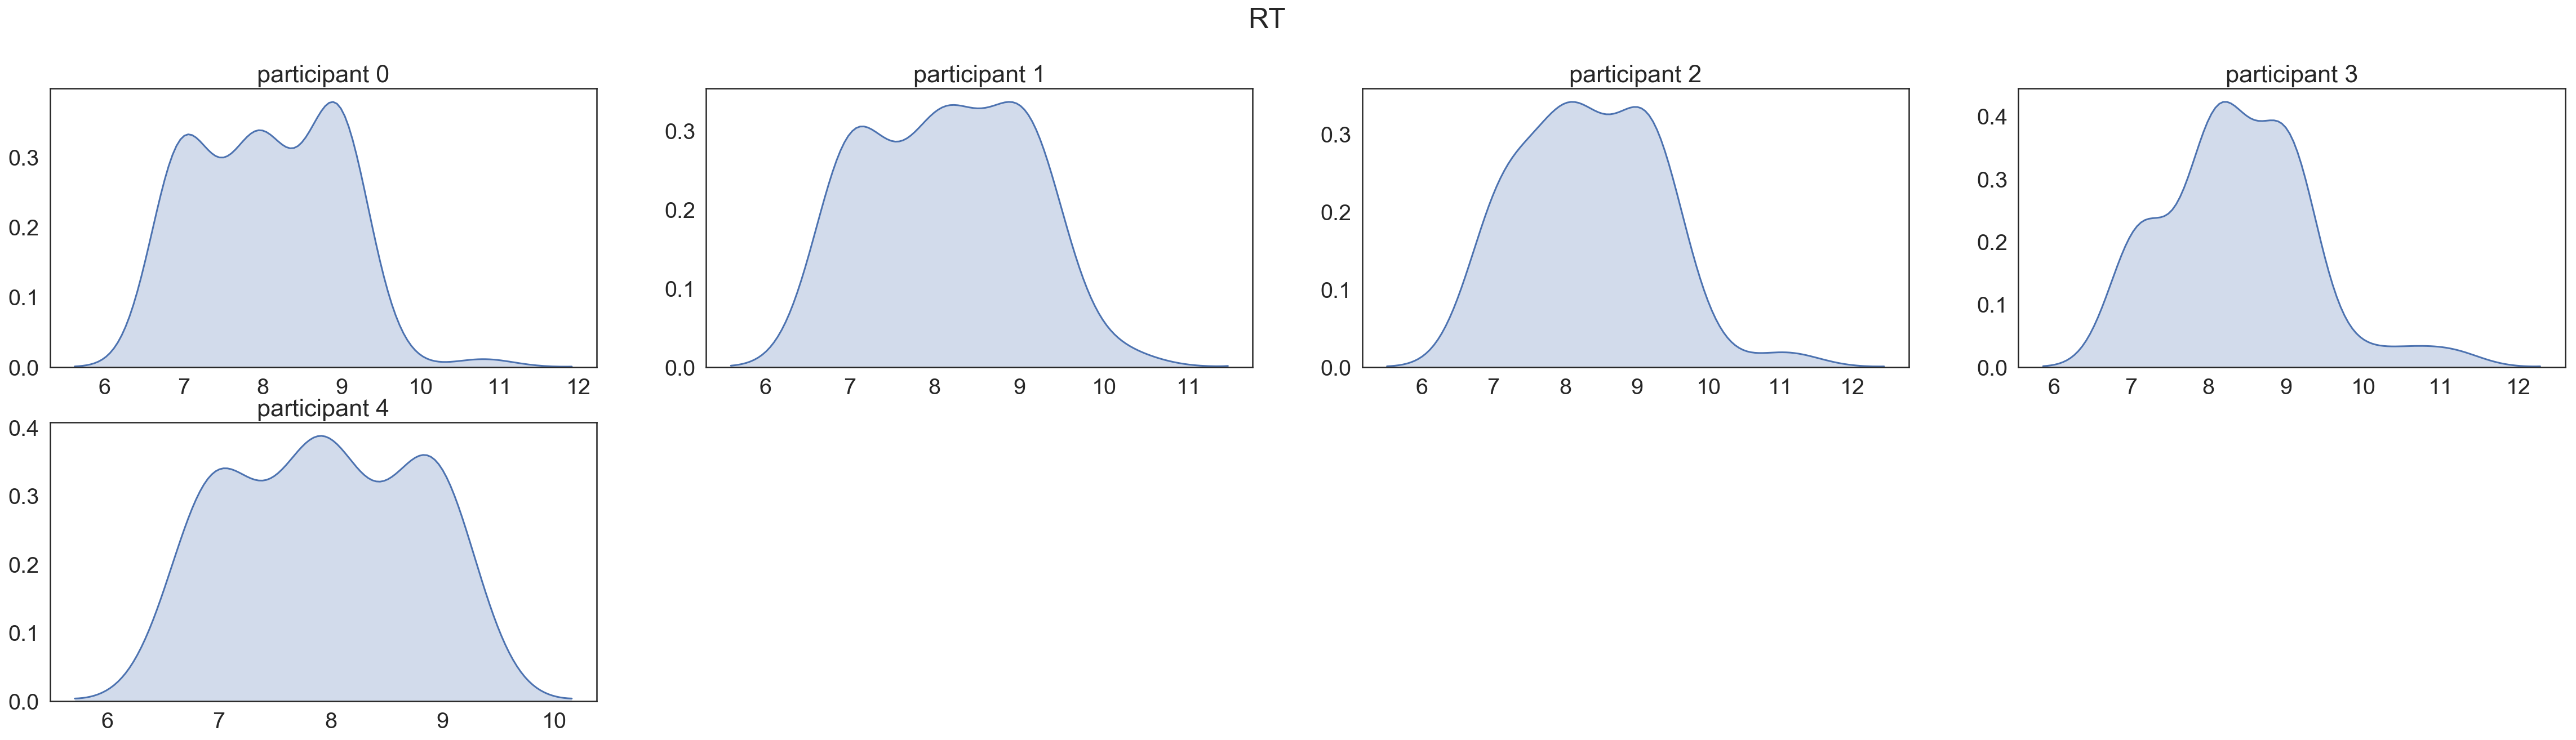

In [143]:
participant_densities(data_exp1,'RT',title = 'RT')

KeyError: 'Frame'

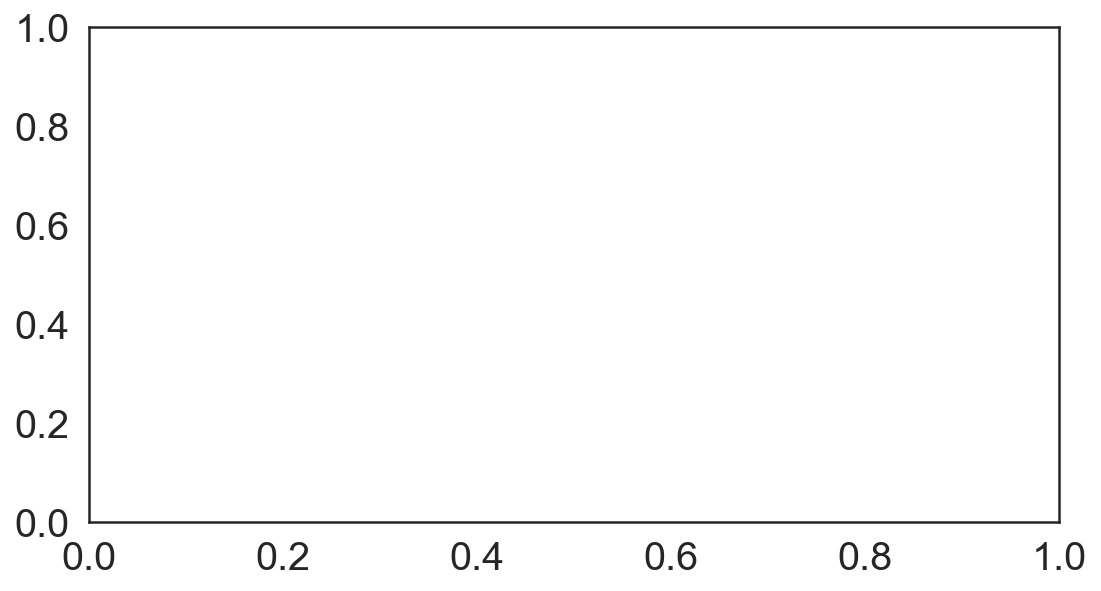

In [144]:
participant_densities(data_exp1,'Frame',title = 'Frame')

#### This plot is just to check if I am presenting a comparable number of trials for each frames (in some cases is different because participants can miss the response)

## 2. Accuracy per participant

In [ ]:
accuracies = pd.DataFrame( columns = [])

In [145]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    accuracy_like.append(data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == i)].correct.mean())
    accuracy_dislike.append(data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == i)].correct.mean())

accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike

In [146]:
accuracies['like'] 

0    0.895833
1    0.833333
2    0.666667
3    0.750000
4    1.000000
Name: like, dtype: float64

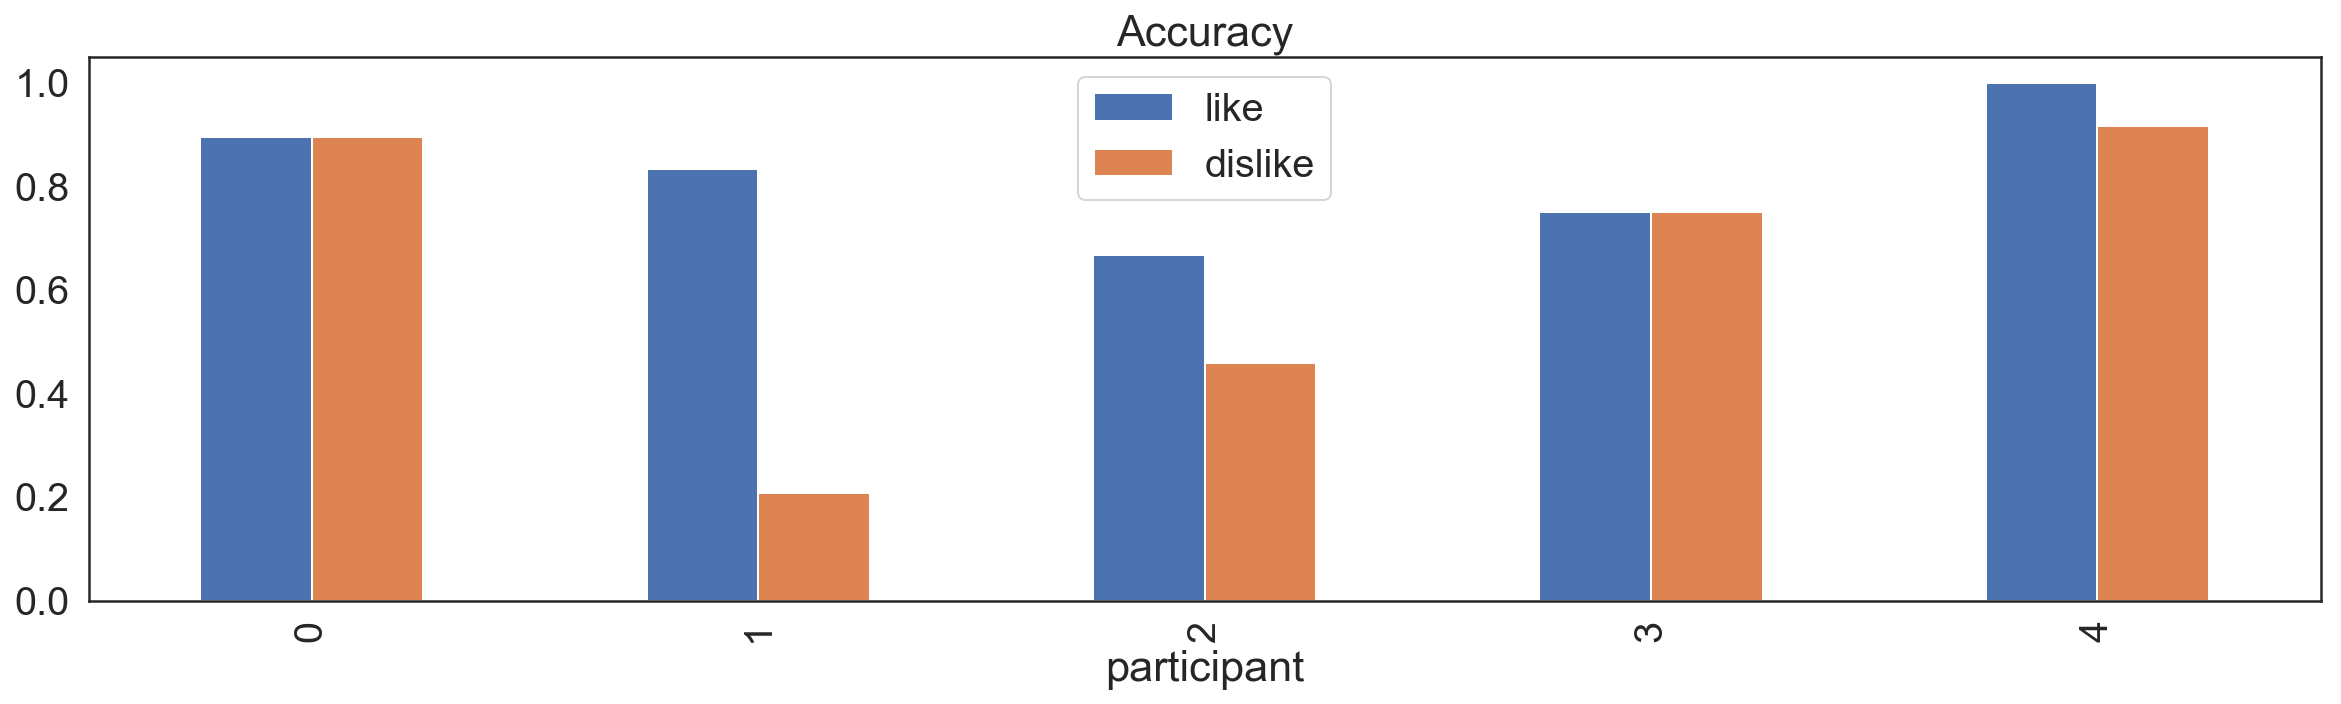

In [147]:
accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Accuracy')

## Split dataframe for like and dislike

In [ ]:
data_expL = data_exp1.loc[(data_exp1['frame'] == 1)] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[(data_exp1['frame'] == 2)] # 1 = Like, 2 = Dislike

In [ ]:
#data_expL = data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike
#data_expD = data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike

## 3. Relationship between RT and |DV| (using ratings given in LIKE frame)

Pearson's r = -0.036 p =  0.547


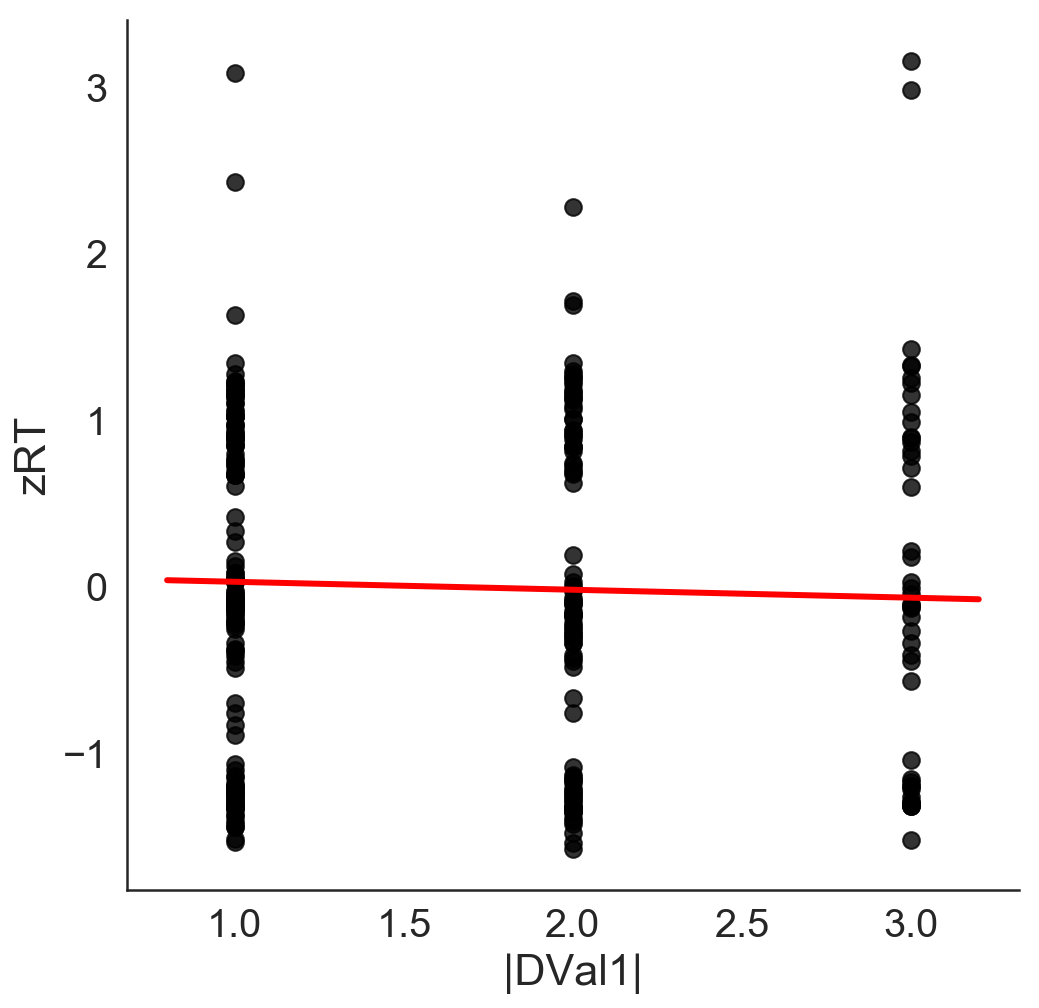

In [107]:
corrPlotSimple(data_exp1, 'absDVal1','|DVal1|','zRT','zRT')

## 4. Logistic plots for choice in like and dislike frames

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

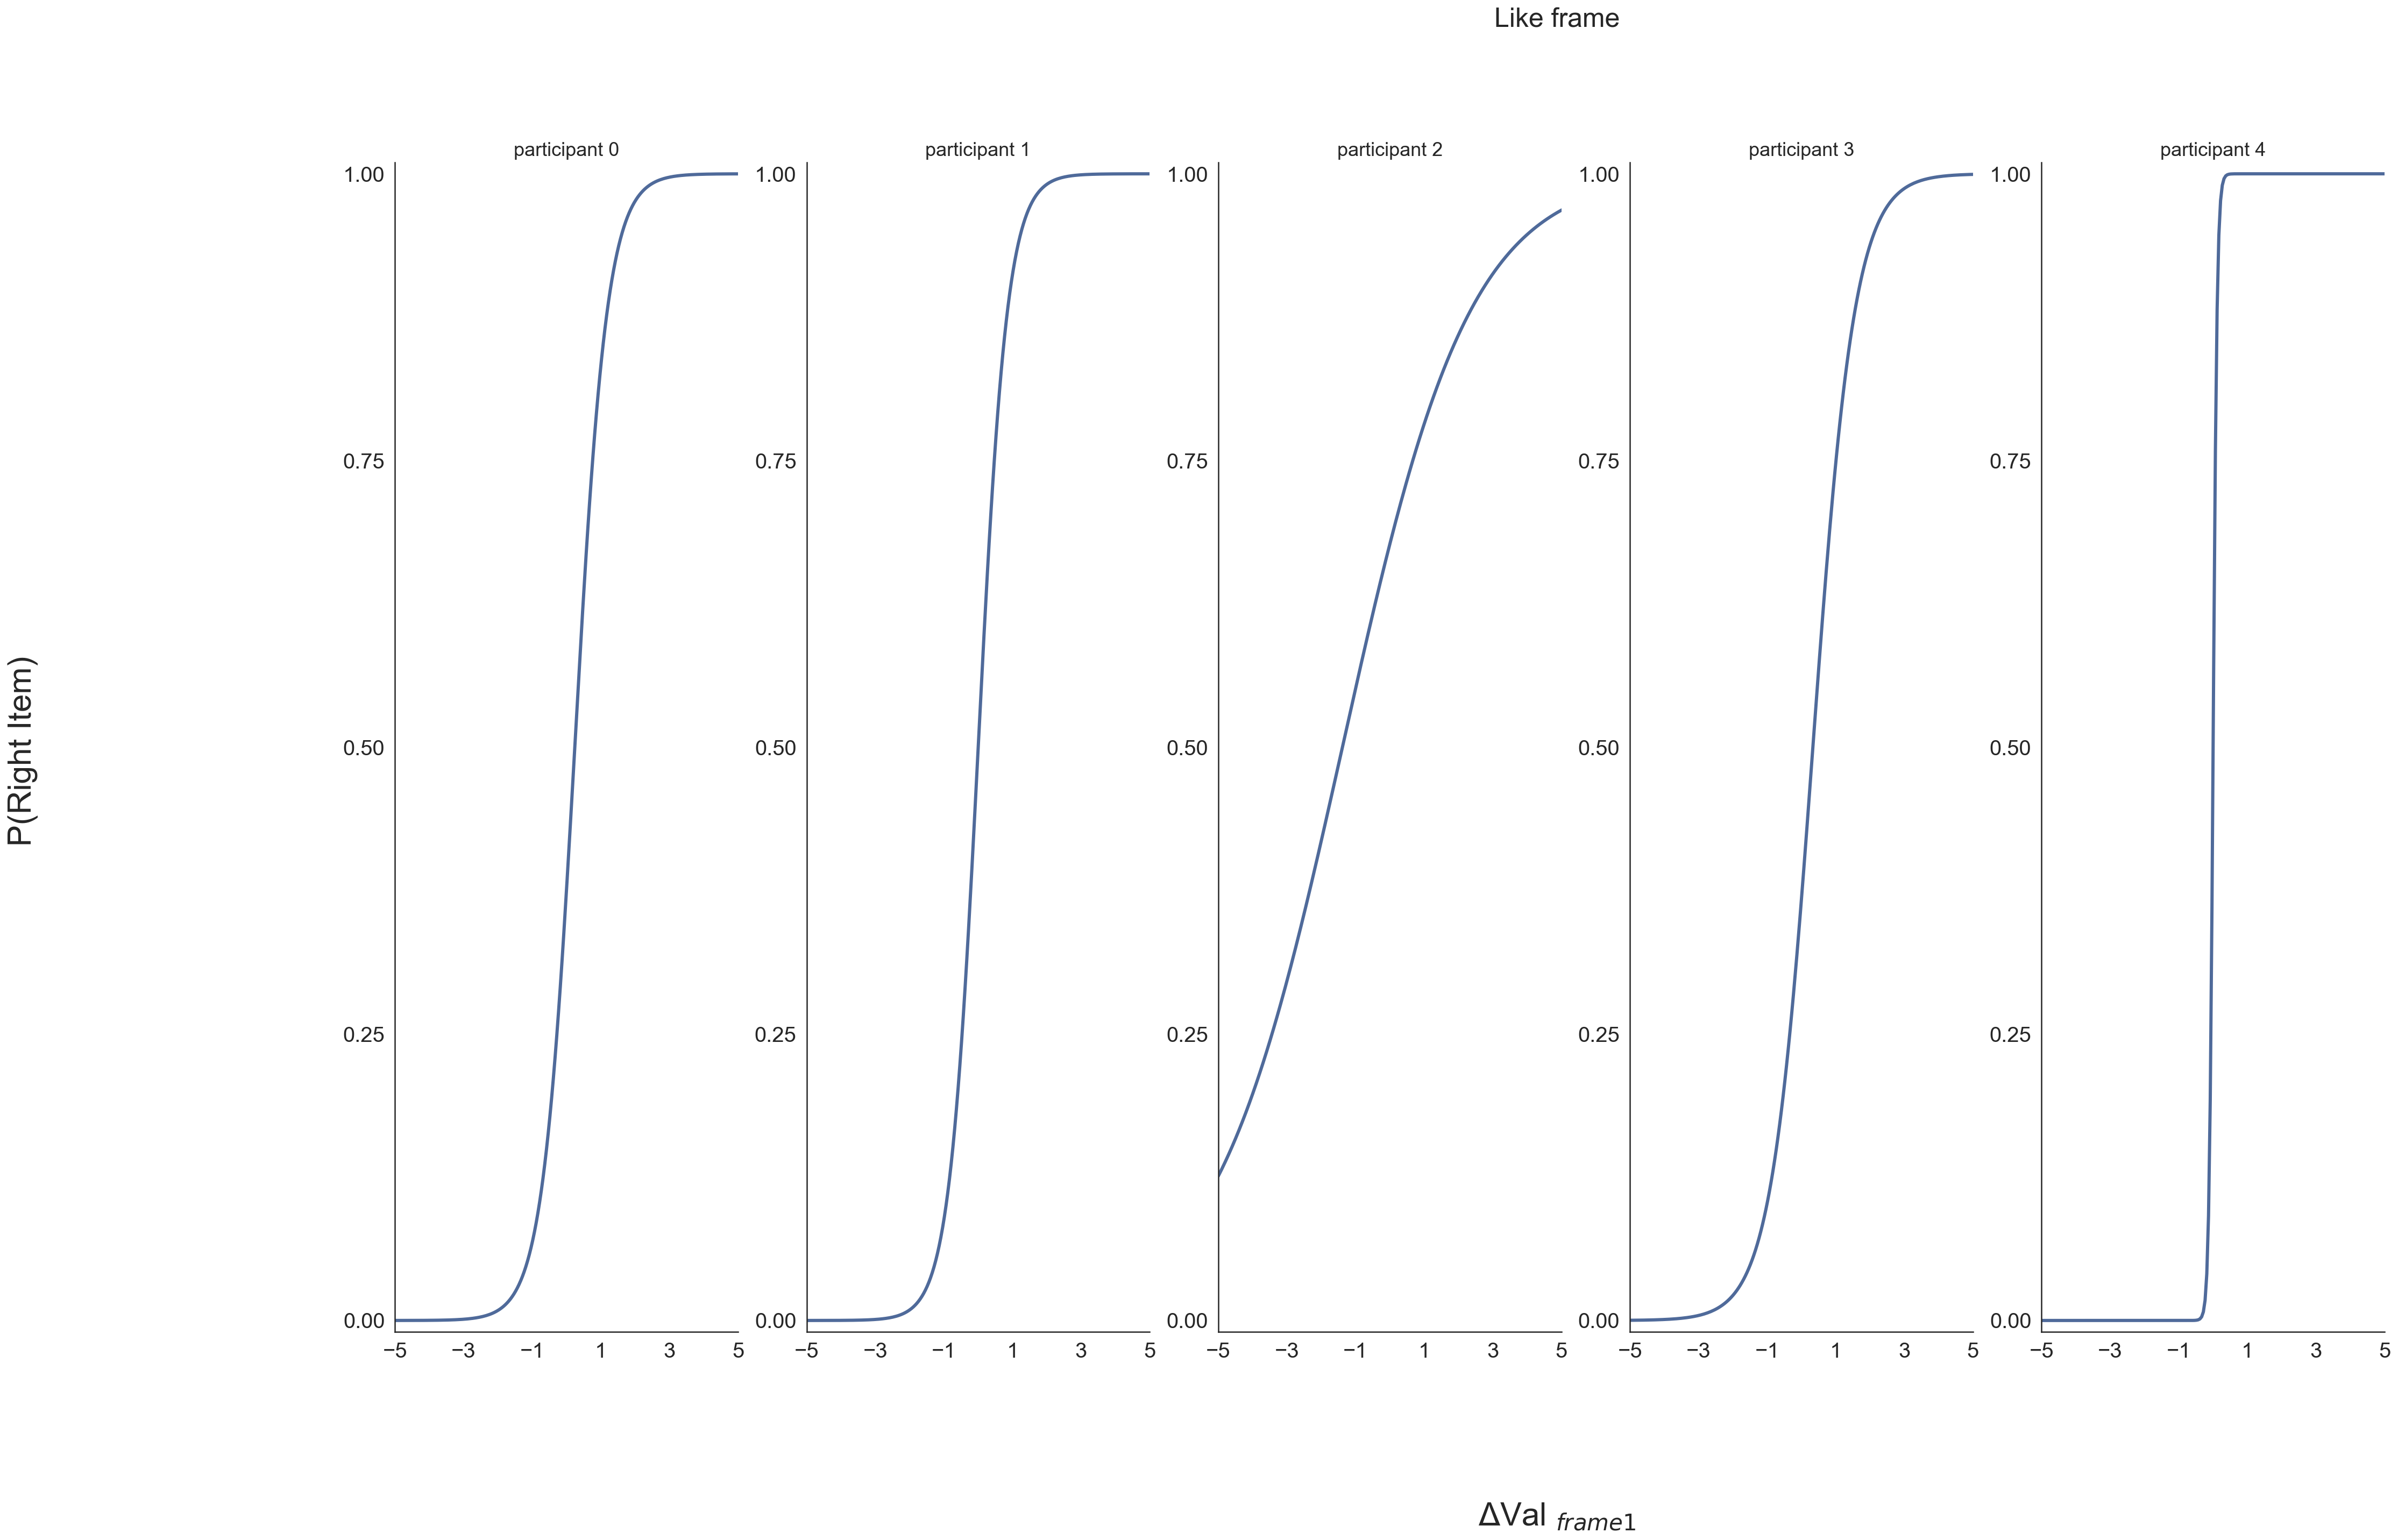

In [127]:
logisticplot_all_part( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

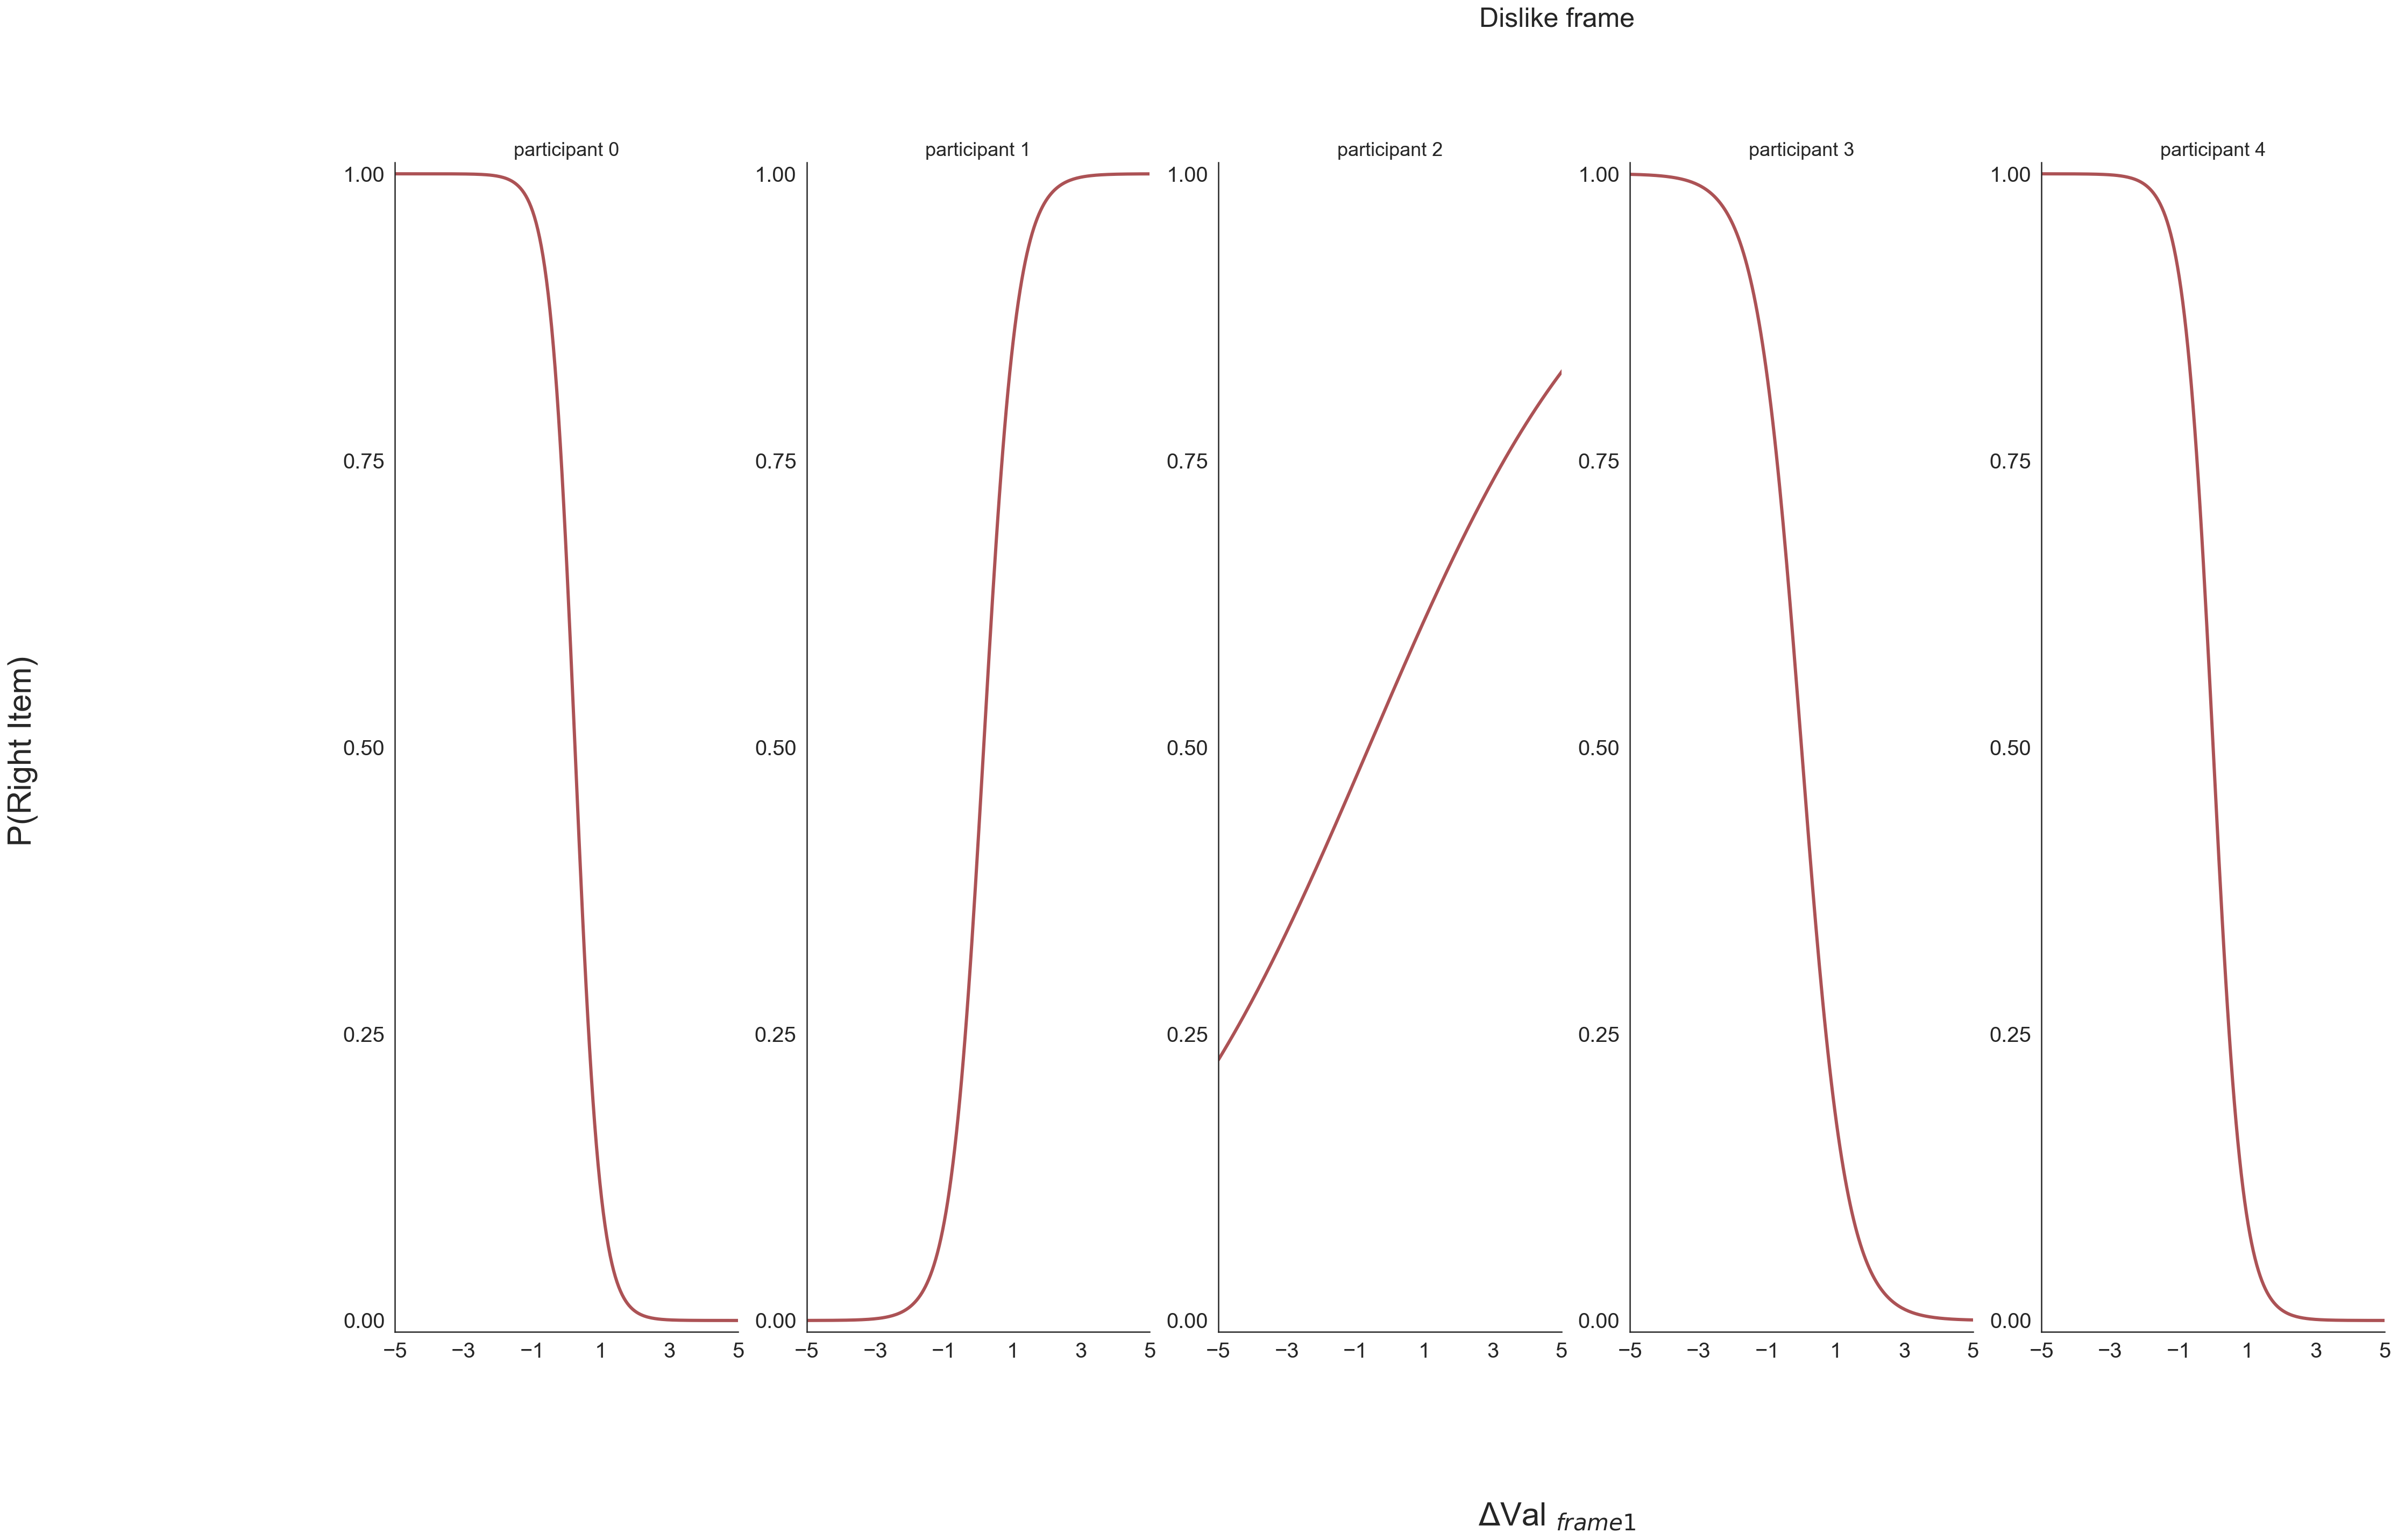

In [128]:
logisticplot_all_part( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

#### Looks like participant 3 did not responded following the change to dislike frame

## 5. Considering logistics plots aggregating all participants

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


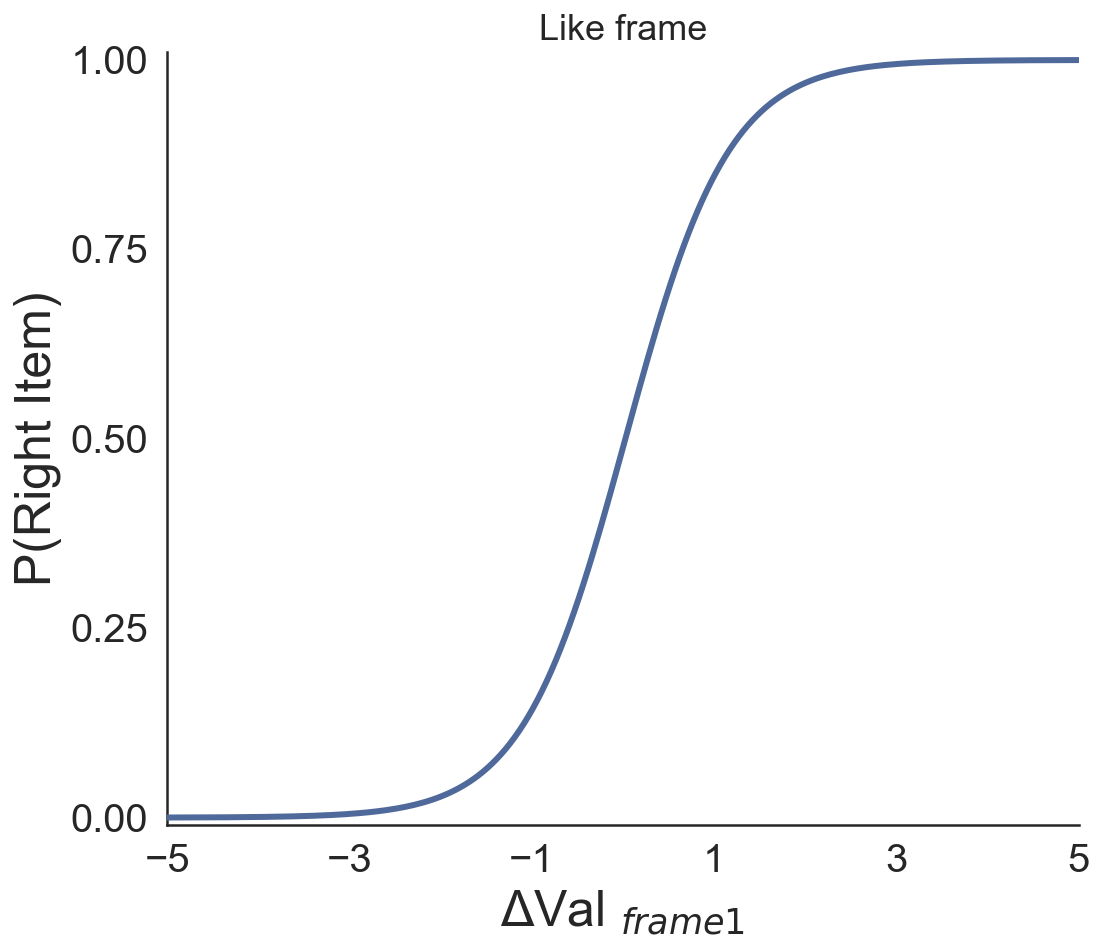

In [129]:
logisticplot_all( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


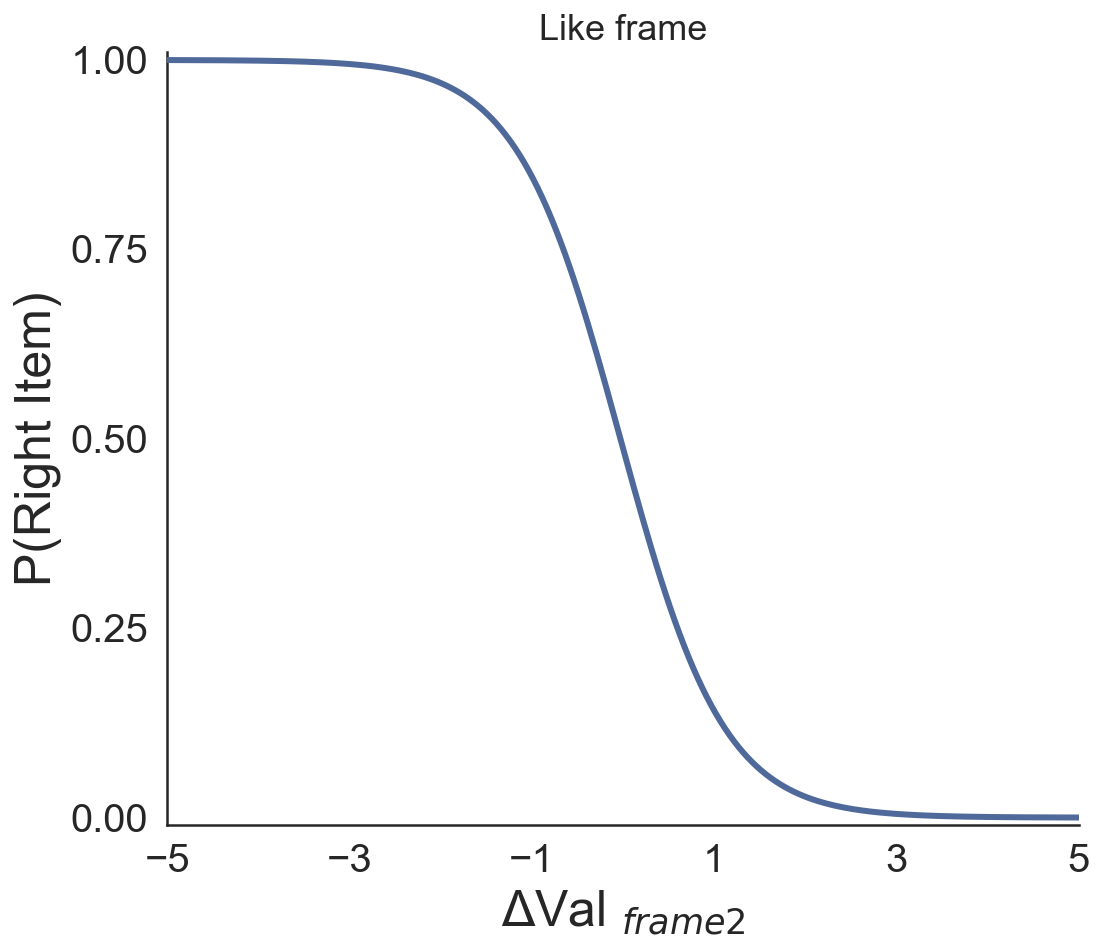

In [130]:
logisticplot_all( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


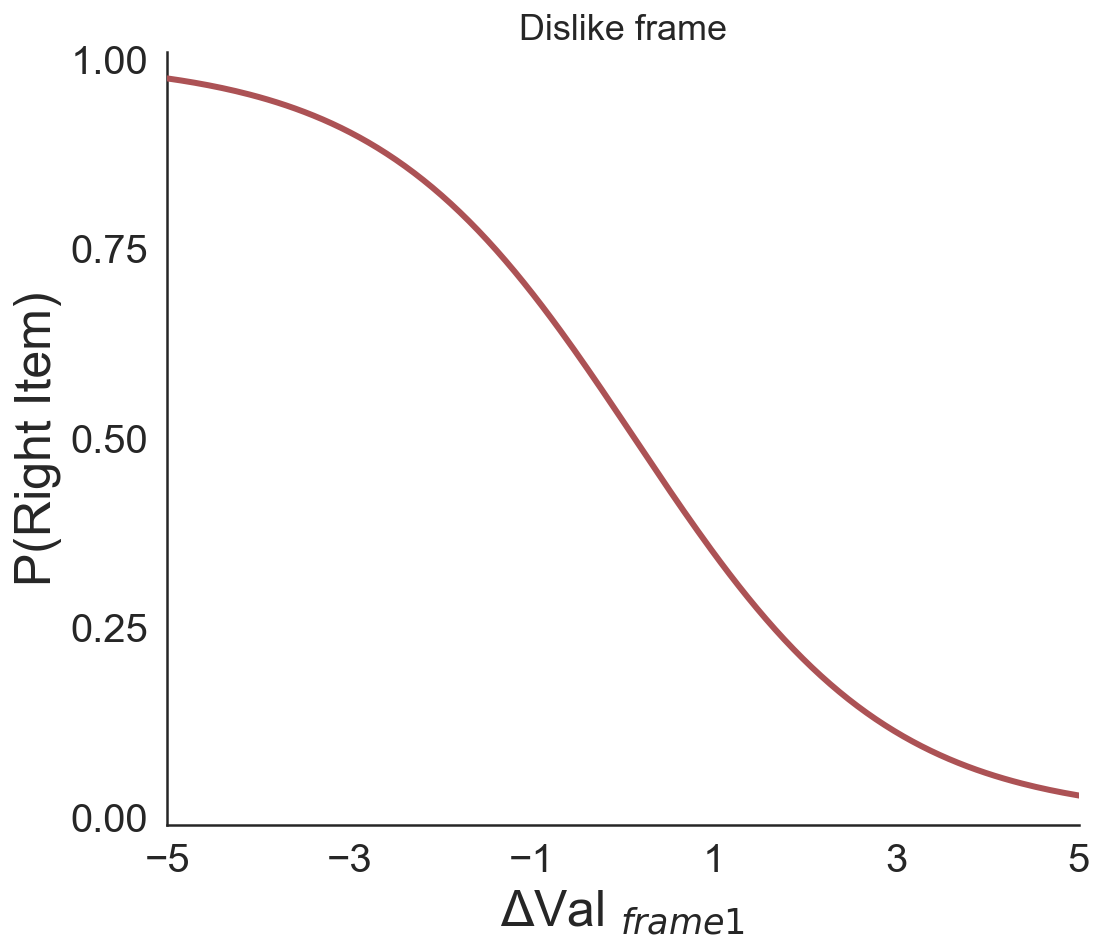

In [131]:
logisticplot_all( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


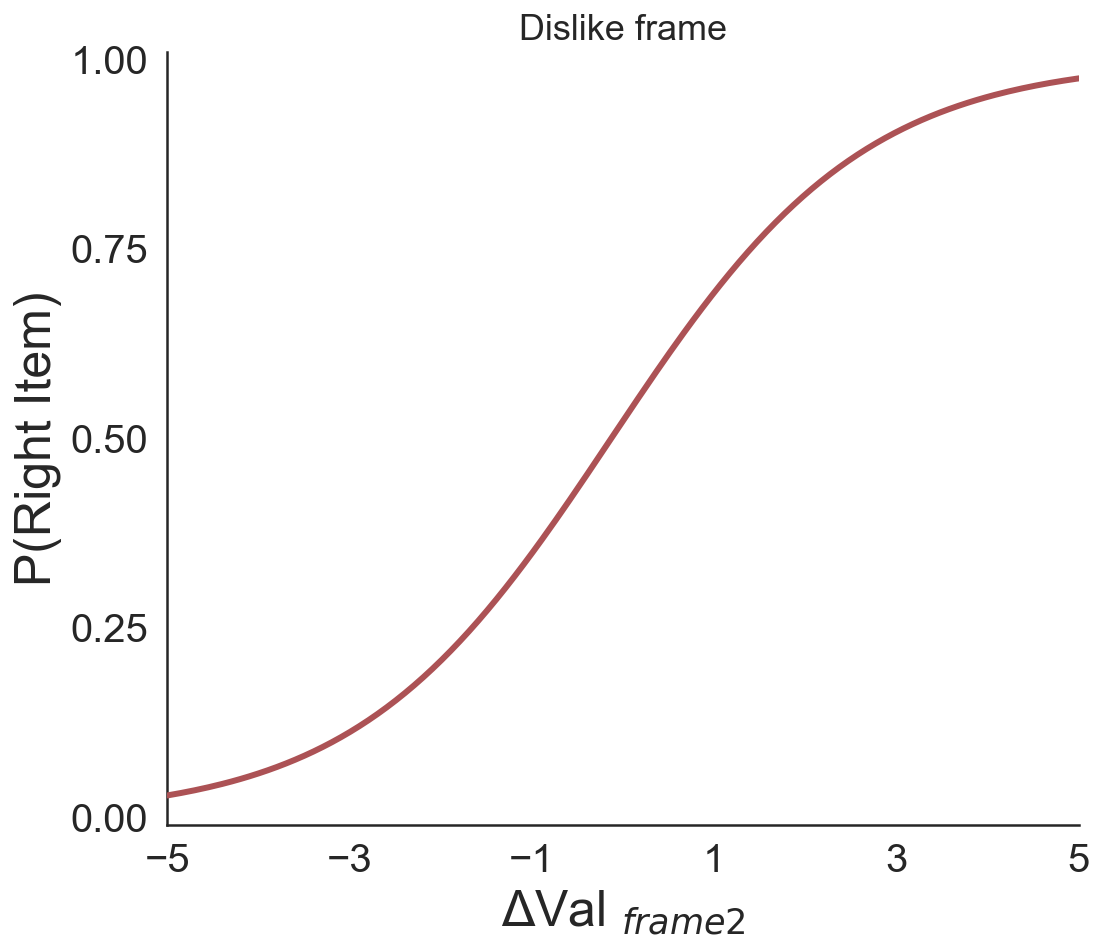

In [132]:
logisticplot_all( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

# 6. (Preliminar)Regression analysis on Choice

In [133]:
%R -i data_exp1
data_exp1

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,index,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,...,zabsDVal2,zDVar1,zabsDVar1,zDVar2,zabsDVar2,zTotVal1,zTotVal2,zRT,correct,choices
0,0,1.0,4.0,NaN,NaN,0,3.0,2.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,-0.774597,0.774597,-0.664135,1,1
1,1,3.0,2.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,0.000000,0.000000,0.339386,1,0
2,2,1.0,4.0,NaN,NaN,0,3.0,2.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,-0.774597,0.774597,1.278176,1,0
3,3,2.0,3.0,NaN,NaN,0,3.0,2.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.235905,0,0
4,4,1.0,4.0,NaN,NaN,0,4.0,1.0,NaN,NaN,...,1.788854,NaN,NaN,NaN,NaN,0.000000,0.000000,-1.040925,1,1
5,5,1.0,4.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,-1.549193,1.549193,0.901472,1,0
6,6,4.0,1.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,0.774597,-0.774597,-1.271666,1,1
7,7,2.0,3.0,NaN,NaN,0,4.0,1.0,NaN,NaN,...,0.447214,NaN,NaN,NaN,NaN,0.774597,-0.774597,1.010278,1,1
8,8,3.0,2.0,NaN,NaN,0,2.0,3.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,0.000000,0.000000,-1.136422,1,1
9,9,2.0,3.0,NaN,NaN,0,1.0,4.0,NaN,NaN,...,-0.894427,NaN,NaN,NaN,NaN,-1.549193,1.549193,0.935646,1,1


In [110]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$frame=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$frame=='2'), ]

[1] "Like BIC:"
[1] 141.4485
[1] "DisLike BIC:"
[1] 192.5906


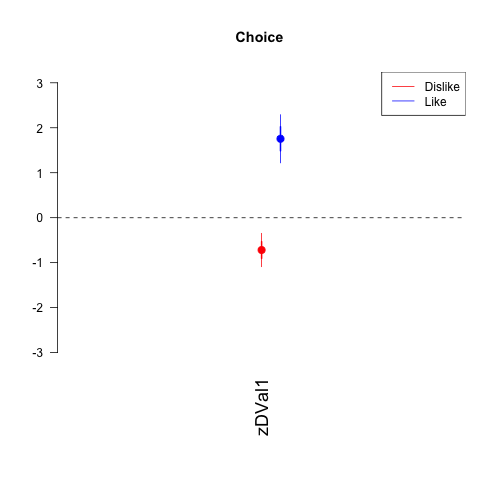

In [111]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 141.4485
[1] "DisLike BIC:"
[1] 192.5906


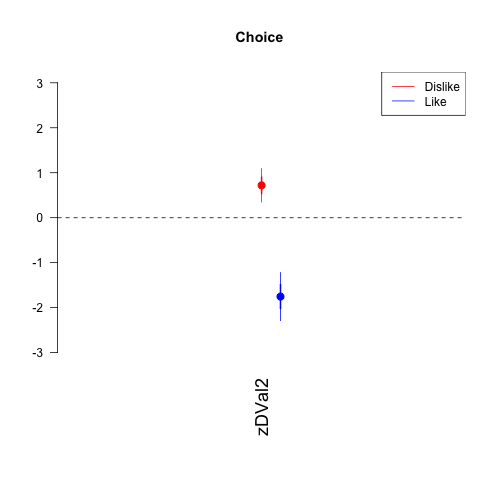

In [112]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### As expected, we observe that the rating given in dislike frame (Frame 2) accounts for the most disliked option, therefore, it predicts the choice maintaing the sign.

In [113]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)


Error in family$linkfun(mustart) : 
  Argument mu must be a nonempty numeric vector


In [114]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)


Error in family$linkfun(mustart) : 
  Argument mu must be a nonempty numeric vector


#### the difference in variability between items seems to not influence choice

## Since I don't have confidence I try to predict RT

[1] "Like BIC:"
[1] 429.9056
[1] "DisLike BIC:"
[1] 424.7461


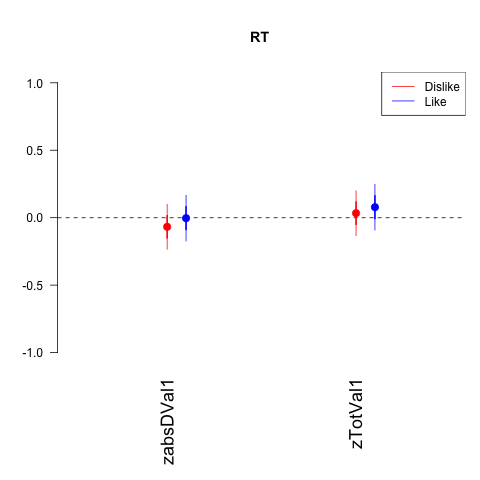

In [115]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 429.9056
[1] "DisLike BIC:"
[1] 424.7461


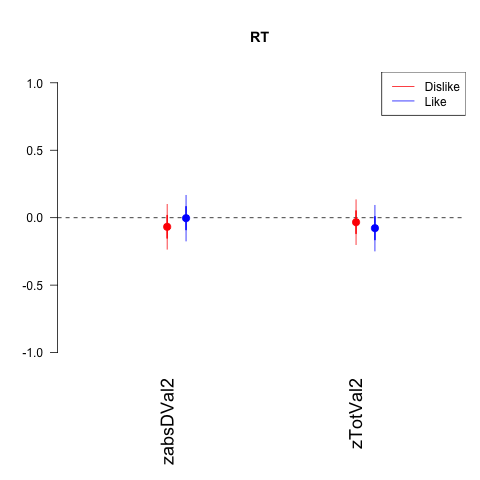

In [116]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### Interesting how we observe a flip for total value, using RT as a proxy for confidence (i.e. if I'm more confident I have lower reaction time. In like frame, if I have higher TotVal, I have lower RT --> high confidence; but in dislike, higher TotVal means higher RT --> lower confidence)  

-----------------------------------------------------

# Import toolboxes and functions

In [89]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [126]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    fig = figure(figsize=(40,20))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
 
    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data['Part'] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [6]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [7]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(40,10))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [8]:
def corrPlotSimple(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_exp1, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1[x_variable]
    y=data_exp1[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    sns.despine()
    
    results = pearsonr(data_exp1[x_variable], data_exp1[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

In [9]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [10]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)